In [1]:
# Standard modules
import pdb
import os
import sys
import json
import time
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append('..')
from simstackwrapper import SimstackWrapper
from simstackresults import SimstackResults
from simstacktoolbox import conv_lir_to_sfr 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [ ]:
path_ini_file = os.path.join("examples","cosmos2020.ini")
cosmos2020 = SimstackWrapper(path_ini_file, read_maps=True, read_catalog=True, stack_automatically=True)
cosmos2020.parse_results()

Simultaneously Stacking 68 Layers in mips_24
Simultaneously Stacking 68 Layers in spire_psw


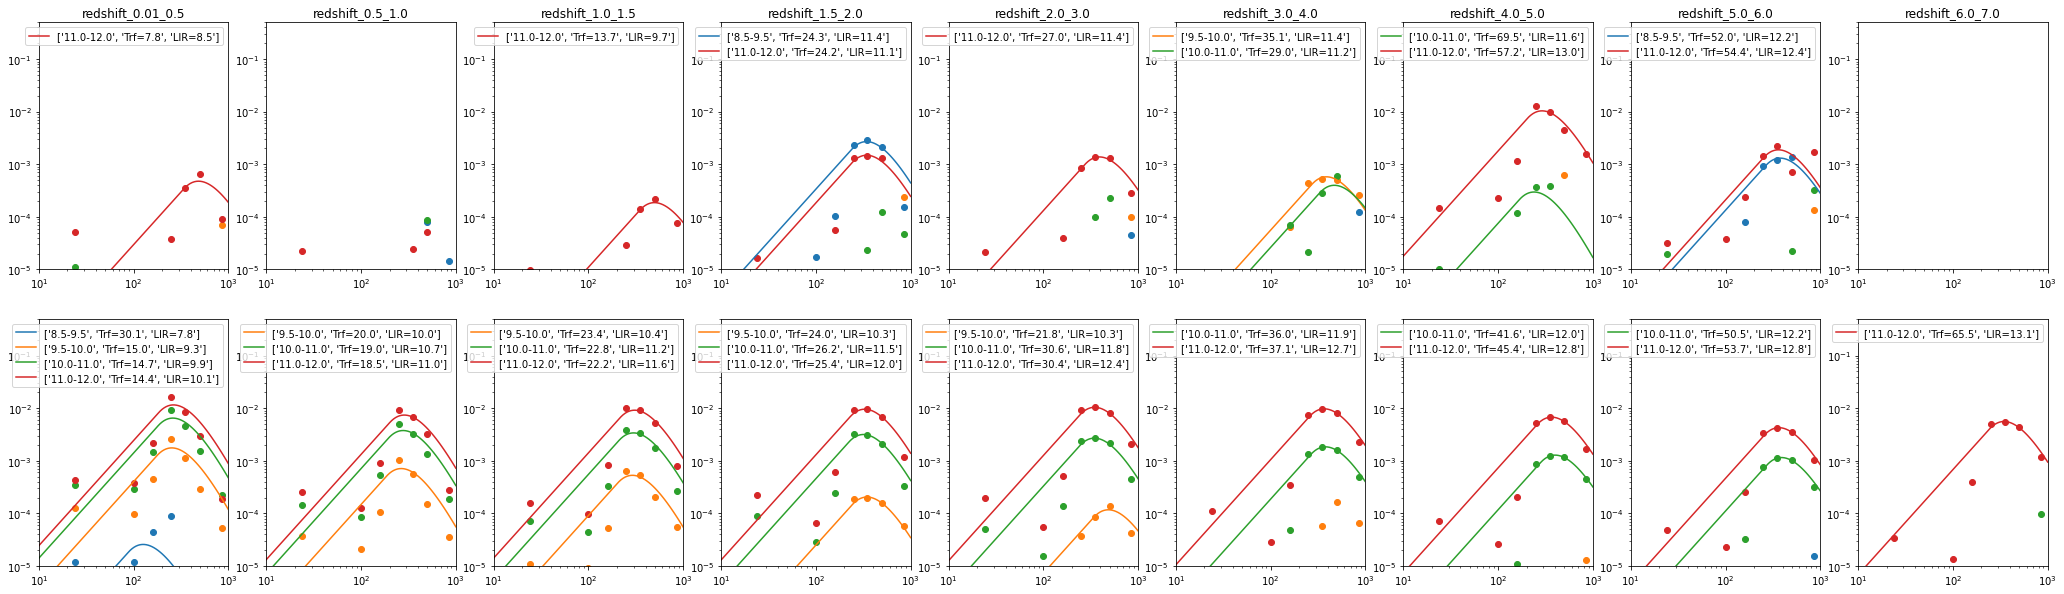

In [3]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    zmid = 0.5*np.sum([float(i) for i in zlab.split('_')[-2:]])
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        std = cosmos2020.results_dict['SED_df']['std_error'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            pdb.set_trace
            #axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            
            #pdb.set_trace()
            LIR = cosmos2020.results_dict['SED_df']['LIR'][zlab][plab][mlab][0]
            sed_params = cosmos2020.results_dict['SED_df']['SED'][zlab][plab][mlab]
            #print(zlab, plab)
            #print(sed_params)
            T_obs = sed_params['T_observed'].value
            T_rf = T_obs * (1+zmid)
            wv_array = cosmos2020.loggen(8, 1000, 100)
            sed_array = cosmos2020.fast_sed(sed_params, wv_array)

            line_label = ['-'.join(mlab.split('_')[-2:]),"Trf={:.1f}".format(T_rf),"LIR={:.1f}".format(np.log10(LIR))]
            if LIR > 0:
                axs[p, z].plot(wv_array, sed_array[0], label=line_label)
                axs[p, z].legend(loc='upper right')
            else:
                axs[p, z].plot(wv_array, sed_array[0])
            
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_xlim([10, 1000])
            axs[p, z].set_ylim([1e-5, 5e-1])

In [7]:
print(cosmos2020.results_dict.keys())

dict_keys(['mips_24', 'pacs_green', 'pacs_red', 'spire_psw', 'spire_pmw', 'spire_plw', 'scuba_850', 'SED_df'])


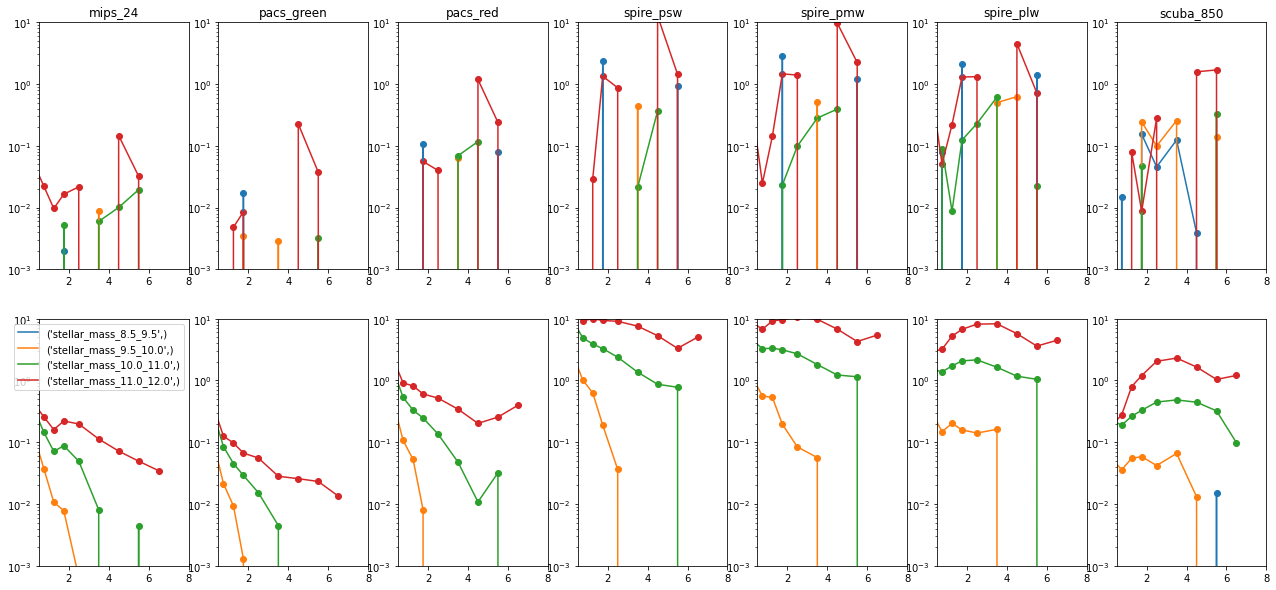

In [10]:
wlen = len(cosmos2020.results_dict)-1
plen = 2 
fig, axs = plt.subplots(plen, wlen, figsize=(22,10))
for iwv, wlab in enumerate(['mips_24', 'pacs_green', 'pacs_red', 'spire_psw', 'spire_pmw', 'spire_plw', 'scuba_850']):
    #pdb.set_trace()
    for ip, plab in enumerate(cosmos2020.results_dict[wlab]['results_df']['flux_df']):
        #print(ip, plab)
        #pdb.set_trace()
        flux_df = cosmos2020.results_dict[wlab]['results_df']['flux_df'][plab]
        for mlab in flux_df:
            #pdb.set_trace()
            axs[ip, iwv].scatter(flux_df[mlab].index, flux_df[mlab].values * 1e3)
            axs[ip, iwv].plot(flux_df[mlab].index, flux_df[mlab].values * 1e3, label=mlab)
            if not ip:
                axs[ip, iwv].set_title(wlab)
            #axs[ip, iwv].set_xscale('log')            
            axs[ip, iwv].set_yscale('log')
            axs[ip, iwv].set_xlim([0.5, 8])
            axs[ip, iwv].set_ylim([1e-3, 1e1])
            if (ip == 1) & (iwv == 0):
                axs[ip, iwv].legend(loc='upper right')

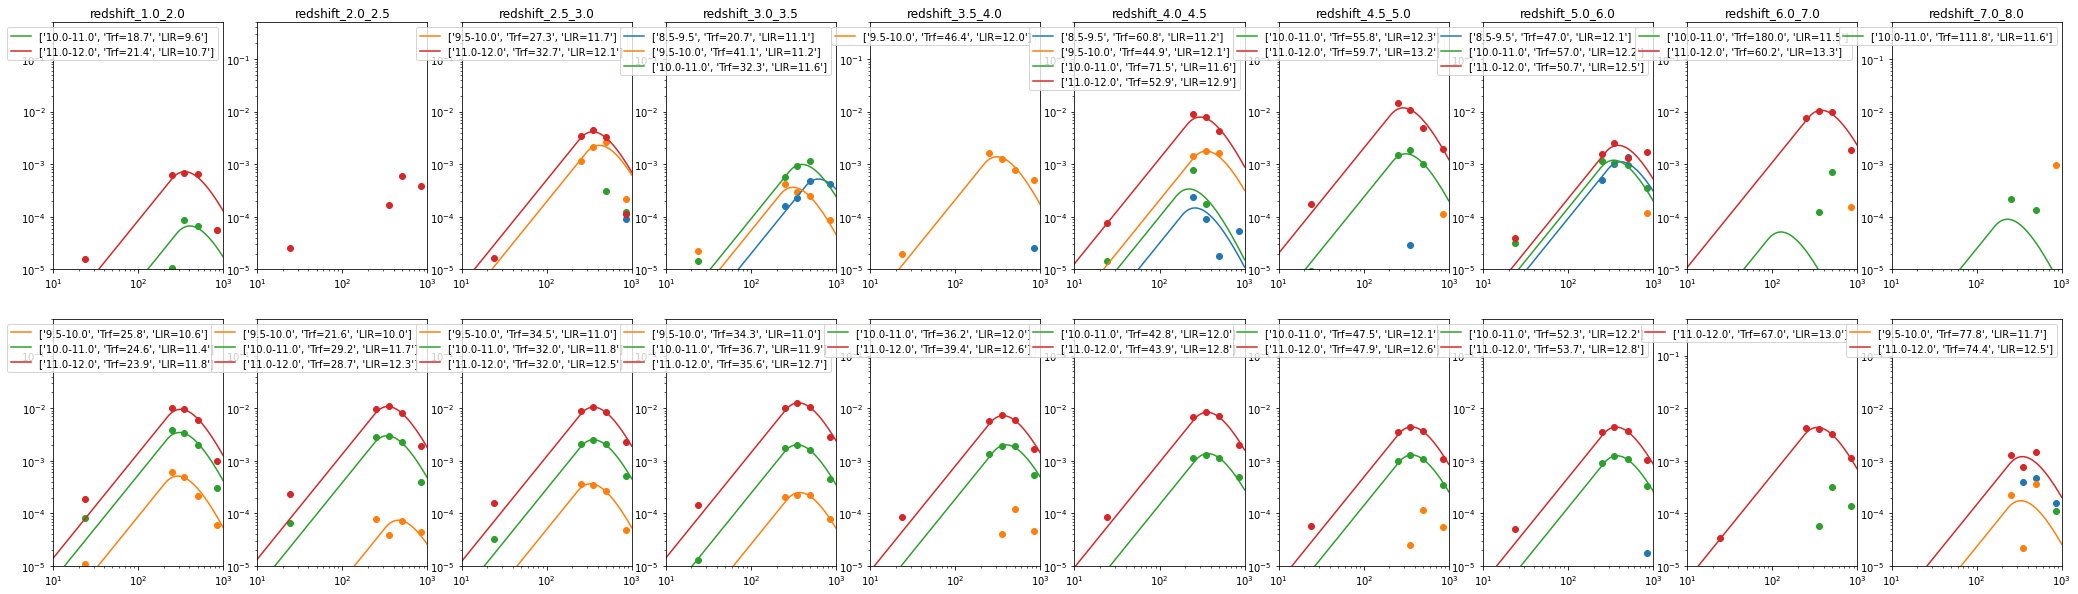

In [45]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    zmid = 0.5*np.sum([float(i) for i in zlab.split('_')[-2:]])
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        std = cosmos2020.results_dict['SED_df']['std_error'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            pdb.set_trace
            #axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            
            #pdb.set_trace()
            LIR = cosmos2020.results_dict['SED_df']['LIR'][zlab][plab][mlab][0]
            sed_params = cosmos2020.results_dict['SED_df']['SED'][zlab][plab][mlab]
            #print(zlab, plab)
            #print(sed_params)
            T_obs = sed_params['T_observed'].value
            T_rf = T_obs * (1+zmid)
            wv_array = cosmos2020.loggen(8, 1000, 100)
            sed_array = cosmos2020.fast_sed(sed_params, wv_array)

            line_label = ['-'.join(mlab.split('_')[-2:]),"Trf={:.1f}".format(T_rf),"LIR={:.1f}".format(np.log10(LIR))]
            if LIR > 0:
                axs[p, z].plot(wv_array, sed_array[0], label=line_label)
                axs[p, z].legend(loc='upper right')
            else:
                axs[p, z].plot(wv_array, sed_array[0])
            
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_xlim([10, 1000])
            axs[p, z].set_ylim([1e-5, 5e-1])

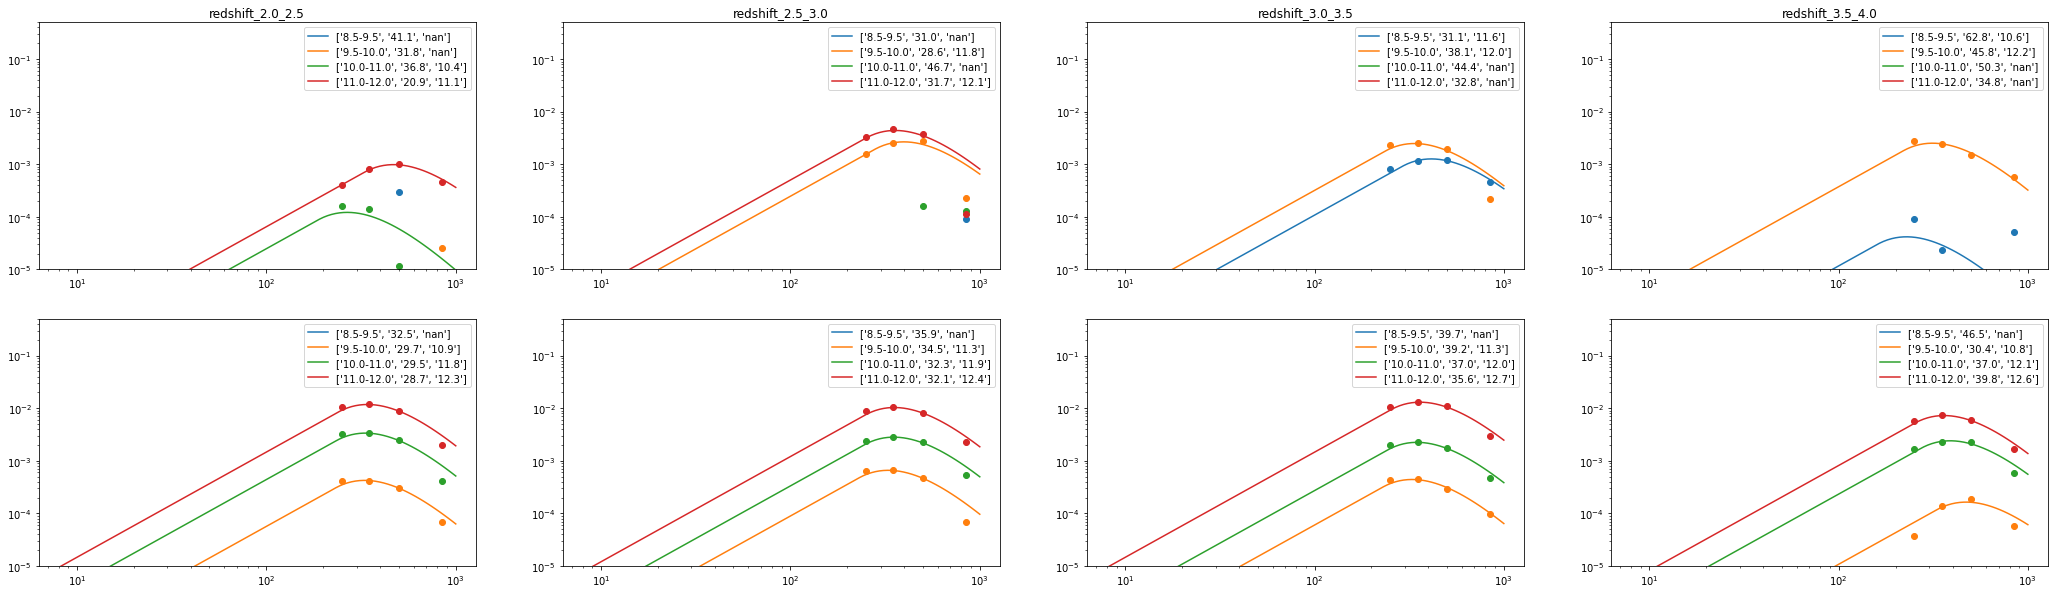

In [31]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    zmid = 0.5*np.sum([float(i) for i in zlab.split('_')[-2:]])
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            #axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            
            #pdb.set_trace()
            LIR = cosmos2020.results_dict['SED_df']['LIR'][zlab][plab][mlab][0]
            sed_params = cosmos2020.results_dict['SED_df']['SED'][zlab][plab][mlab]
            #print(zlab, plab)
            #print(sed_params)
            T_obs = sed_params['T_observed'].value
            T_rf = T_obs * (1+zmid)
            wv_array = cosmos2020.loggen(8, 1000, 100)
            sed_array = cosmos2020.fast_sed(sed_params, wv_array)
            
            #pdb.set_trace()
            #line_label = "M={},T={0:.1g},LIR={}".format(mlab.split('_')[-2:], T_obs, LIR)
            line_label = ['-'.join(mlab.split('_')[-2:]),"{:.1f}".format(T_rf),"{:.1f}".format(np.log10(LIR))]
            axs[p, z].plot(wv_array, sed_array[0], label=line_label)
            
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([1e-5, 5e-1])
            axs[p, z].legend(loc='upper right')

In [20]:
['-'.join(mlab.split('_')[-2:]),"{:.1f}".format(T_obs),"{:.1f}".format(np.log10(LIR))]

['8.5-9.5', '12.6', 'nan']

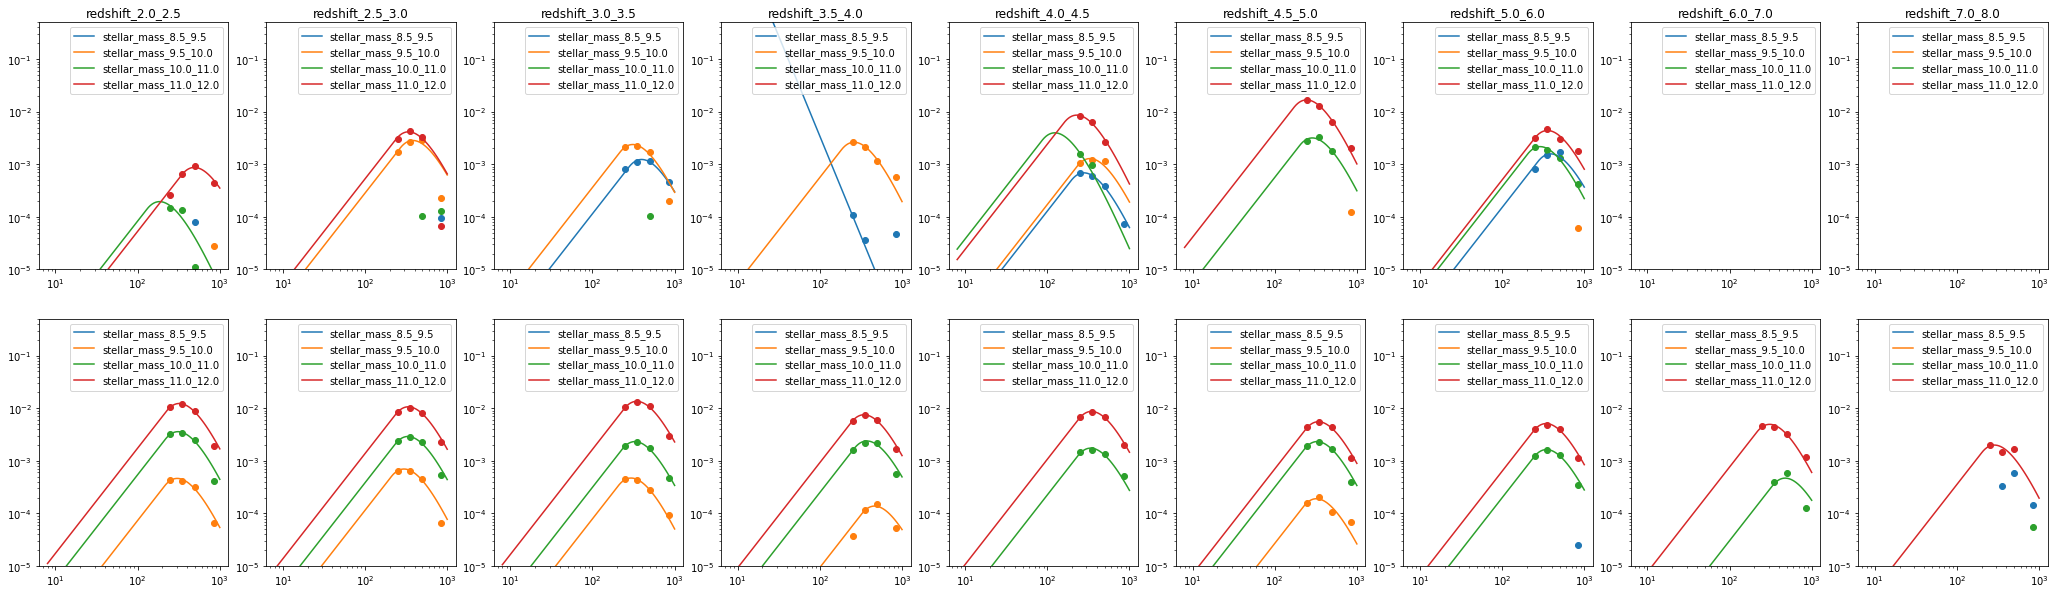

In [6]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            #axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            
            #pdb.set_trace()
            LIR = cosmos2020.results_dict['SED_df']['LIR'][zlab][plab][mlab][0]
            sed_params = cosmos2020.results_dict['SED_df']['SED'][zlab][plab][mlab]
            #print(zlab, plab)
            #print(sed_params)
            T_obs = sed_params['T_observed'].value
            wv_array = cosmos2020.loggen(8, 1000, 100)
            sed_array = cosmos2020.fast_sed(sed_params, wv_array)
            
            #pdb.set_trace()
            axs[p, z].plot(wv_array, sed_array[0], label=mlab)
            
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([1e-5, 5e-1])
            axs[p, z].legend(loc='upper right')

In [47]:
print(cosmos2020.results_dict.keys())

dict_keys(['pacs_red', 'spire_psw', 'spire_pmw', 'spire_plw', 'scuba_850', 'SED_df', 'pacs_green', 'mips_24'])


KeyError: 'results_df'

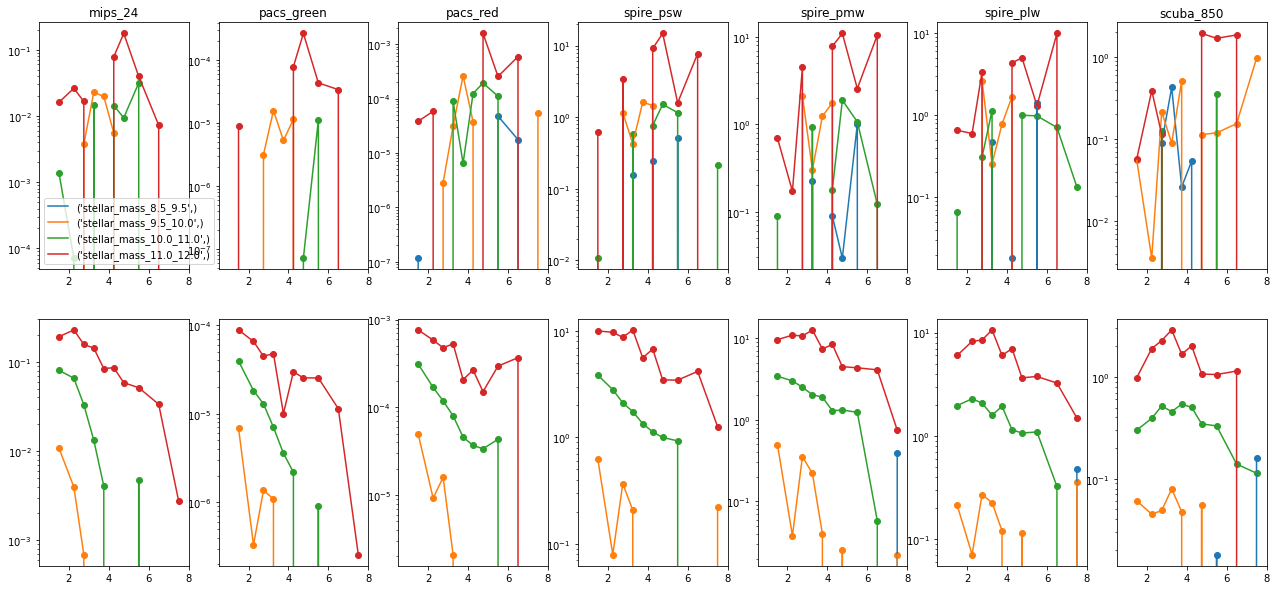

In [53]:
wlen = len(cosmos2020.results_dict)-1
plen = 2 
fig, axs = plt.subplots(plen, wlen, figsize=(22,10))
for iwv, wlab in enumerate(['mips_24', 'pacs_green', 'pacs_red', 'spire_psw', 'spire_pmw', 'spire_plw', 'scuba_850', 'SED_df']):
    #pdb.set_trace()
    for ip, plab in enumerate(cosmos2020.results_dict[wlab]['results_df']['flux_df']):
        #print(ip, plab)
        #pdb.set_trace()
        flux_df = cosmos2020.results_dict[wlab]['results_df']['flux_df'][plab]
        for mlab in flux_df:
            #pdb.set_trace()
            axs[ip, iwv].scatter(flux_df[mlab].index, flux_df[mlab].values * 1e3)
            axs[ip, iwv].plot(flux_df[mlab].index, flux_df[mlab].values * 1e3, label=mlab)
            if not ip:
                axs[ip, iwv].set_title(wlab)
            #axs[ip, iwv].set_xscale('log')            
            axs[ip, iwv].set_yscale('log')
            axs[ip, iwv].set_xlim([0.5, 8])
            if (ip == 0) & (iwv == 0):
                axs[ip, iwv].legend(loc='lower left')

# 

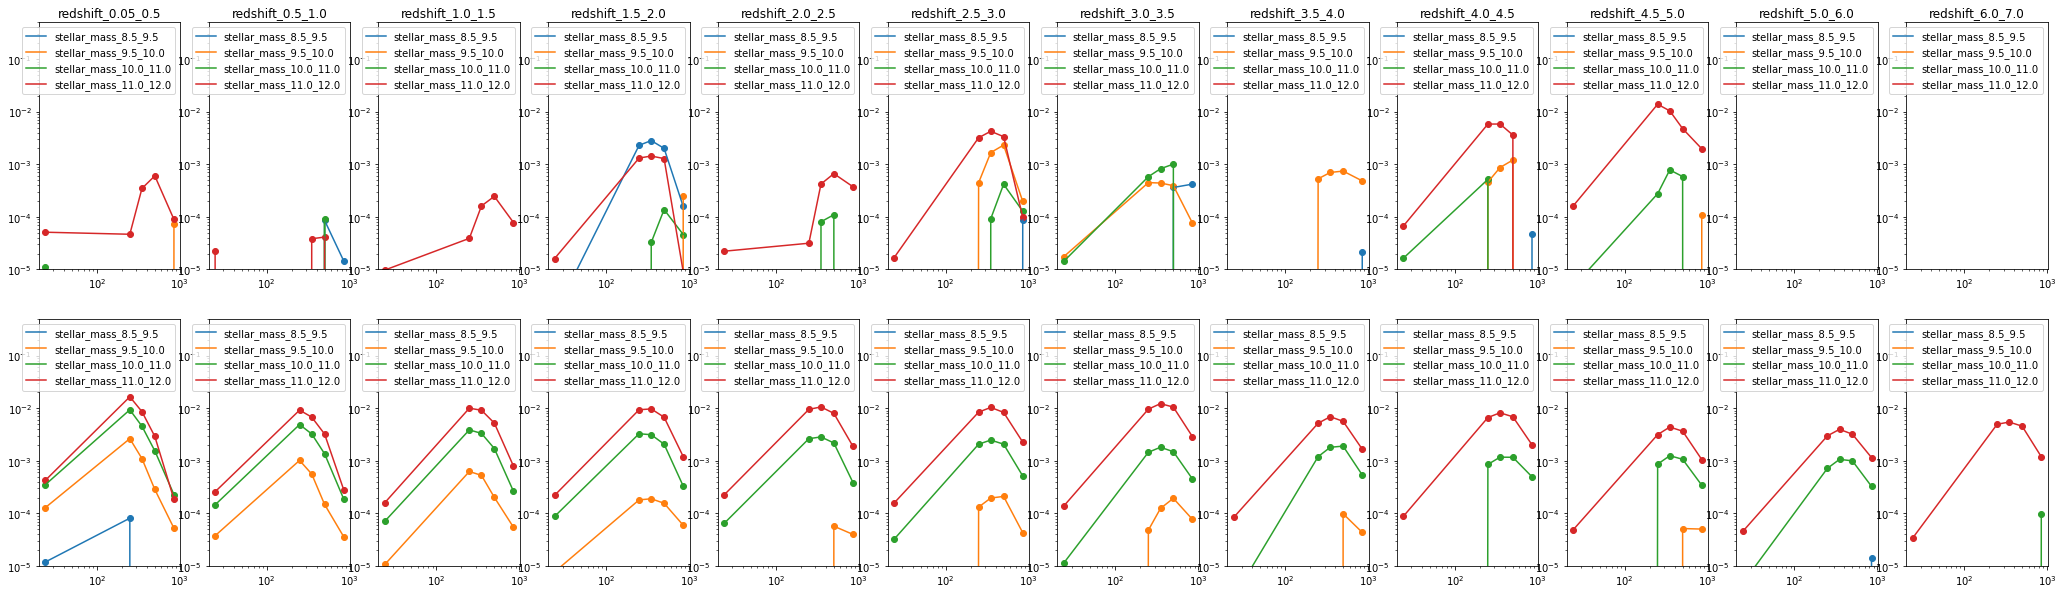

In [4]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([1e-5, 5e-1])
            axs[p, z].legend(loc='upper right')

In [5]:
path_ini_file = os.path.join("examples","cosmos2020_highz.ini")
cosmos2020 = SimstackWrapper(path_ini_file, read_maps=True, read_catalog=True, stack_automatically=True)
cosmos2020.parse_results()

Simultaneously Stacking 48 Layers in mips_24
Simultaneously Stacking 48 Layers in spire_psw
Simultaneously Stacking 48 Layers in spire_pmw
Simultaneously Stacking 48 Layers in spire_plw
Simultaneously Stacking 48 Layers in scuba_850


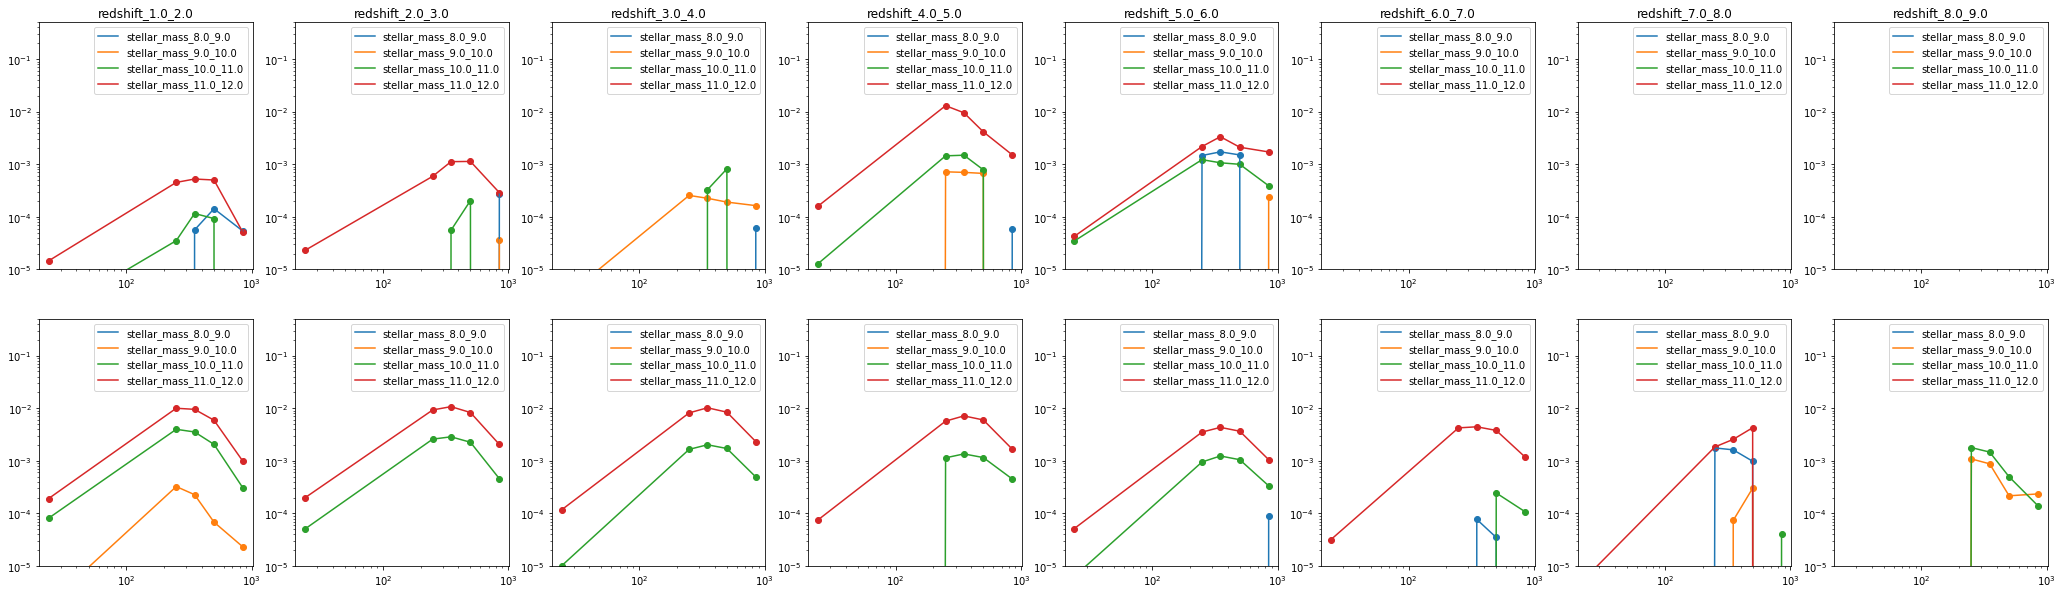

In [3]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([1e-5, 5e-1])
            axs[p, z].legend(loc='upper right')

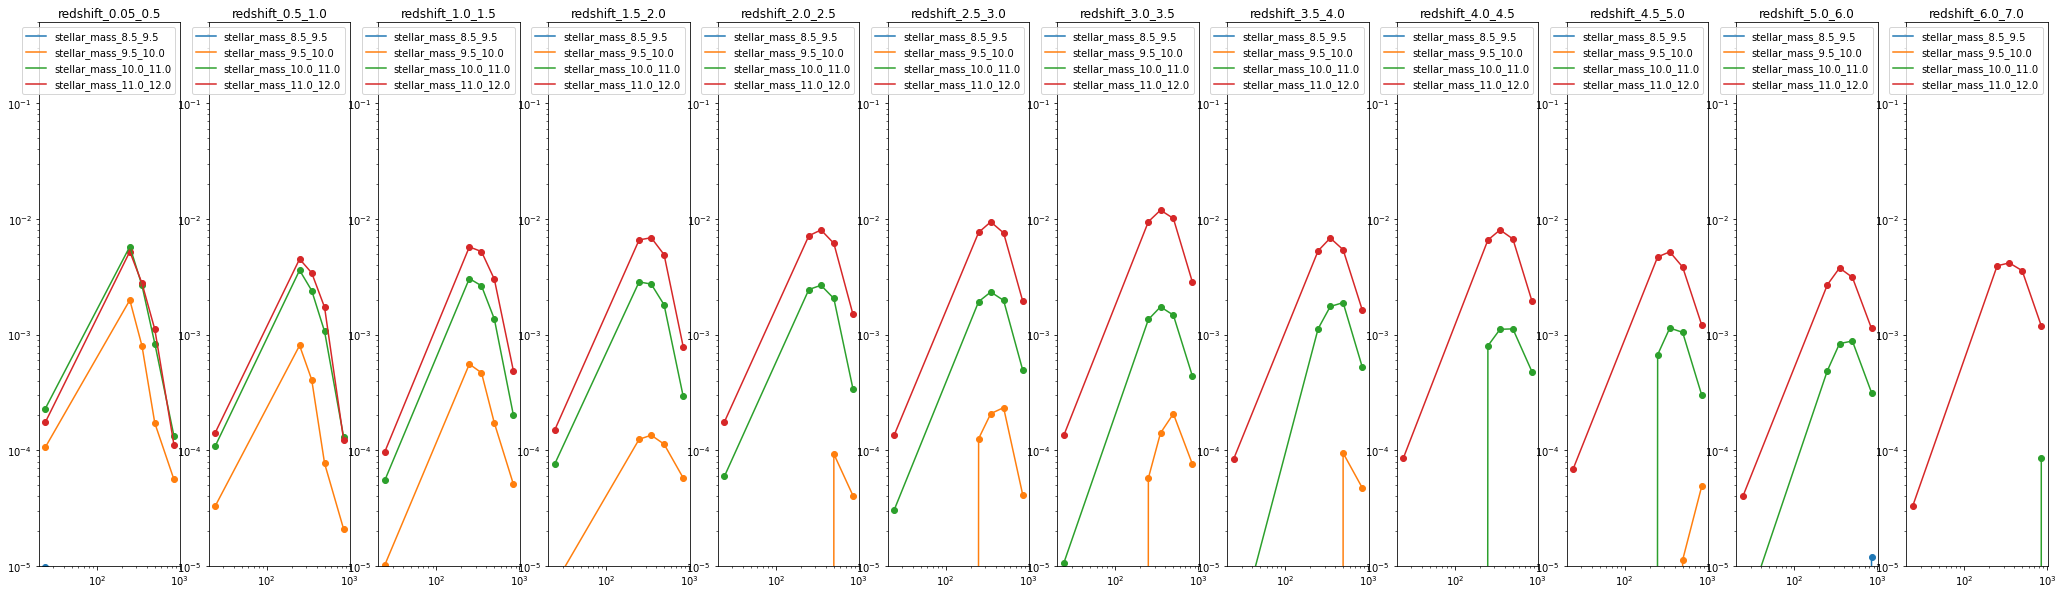

In [6]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 1
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        axs[z].scatter(sed.index, sed)
        axs[z].plot(sed.index, sed, label=plab)
        
        axs[z].set_title(zlab)
        axs[z].set_xscale('log')            
        axs[z].set_yscale('log')
        axs[z].set_ylim([1e-5, 5e-1])
        axs[z].legend(loc='upper right')

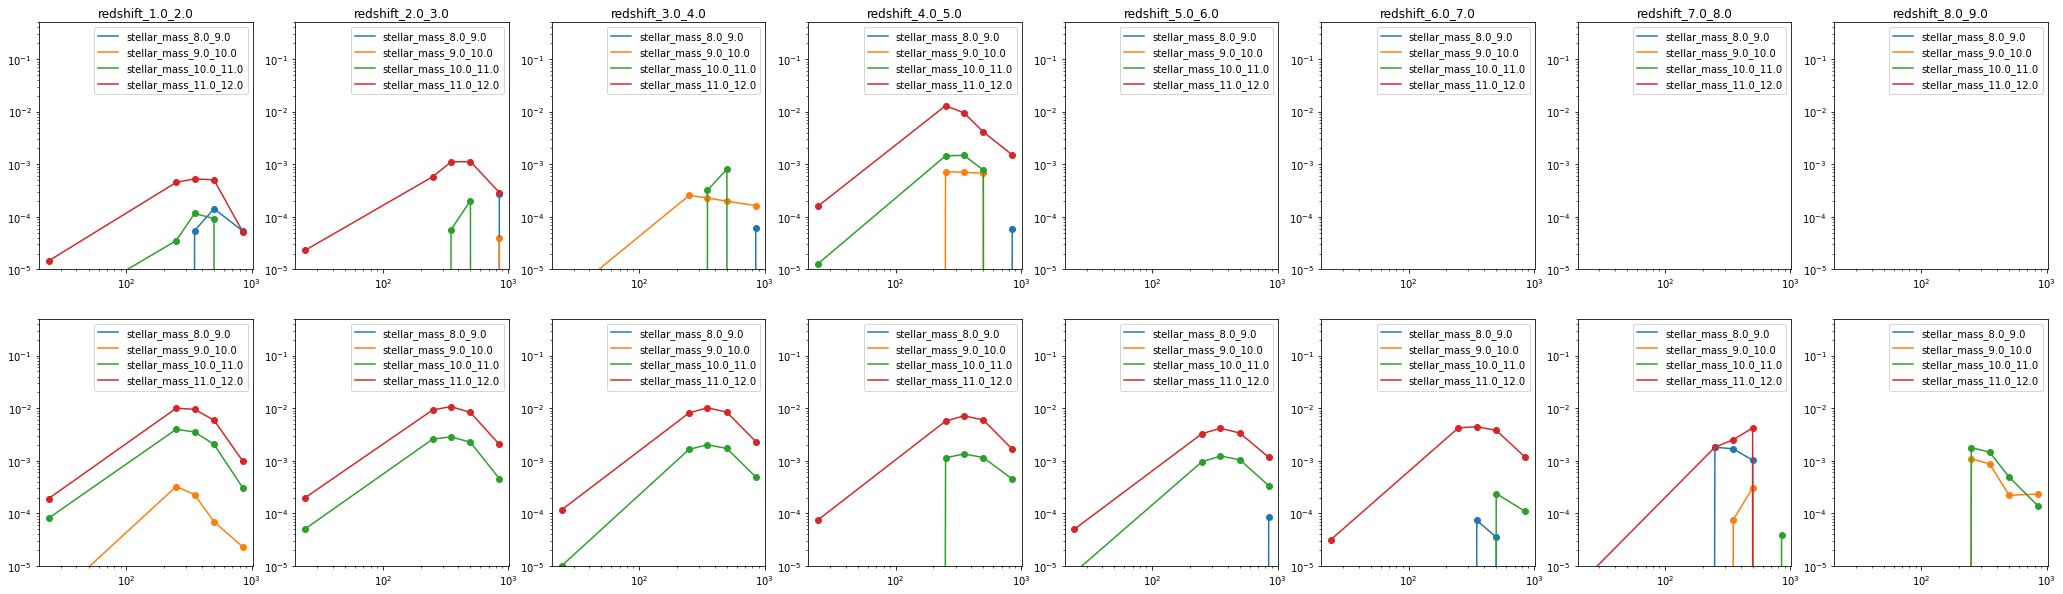

In [5]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([1e-5, 5e-1])
            axs[p, z].legend(loc='upper right')

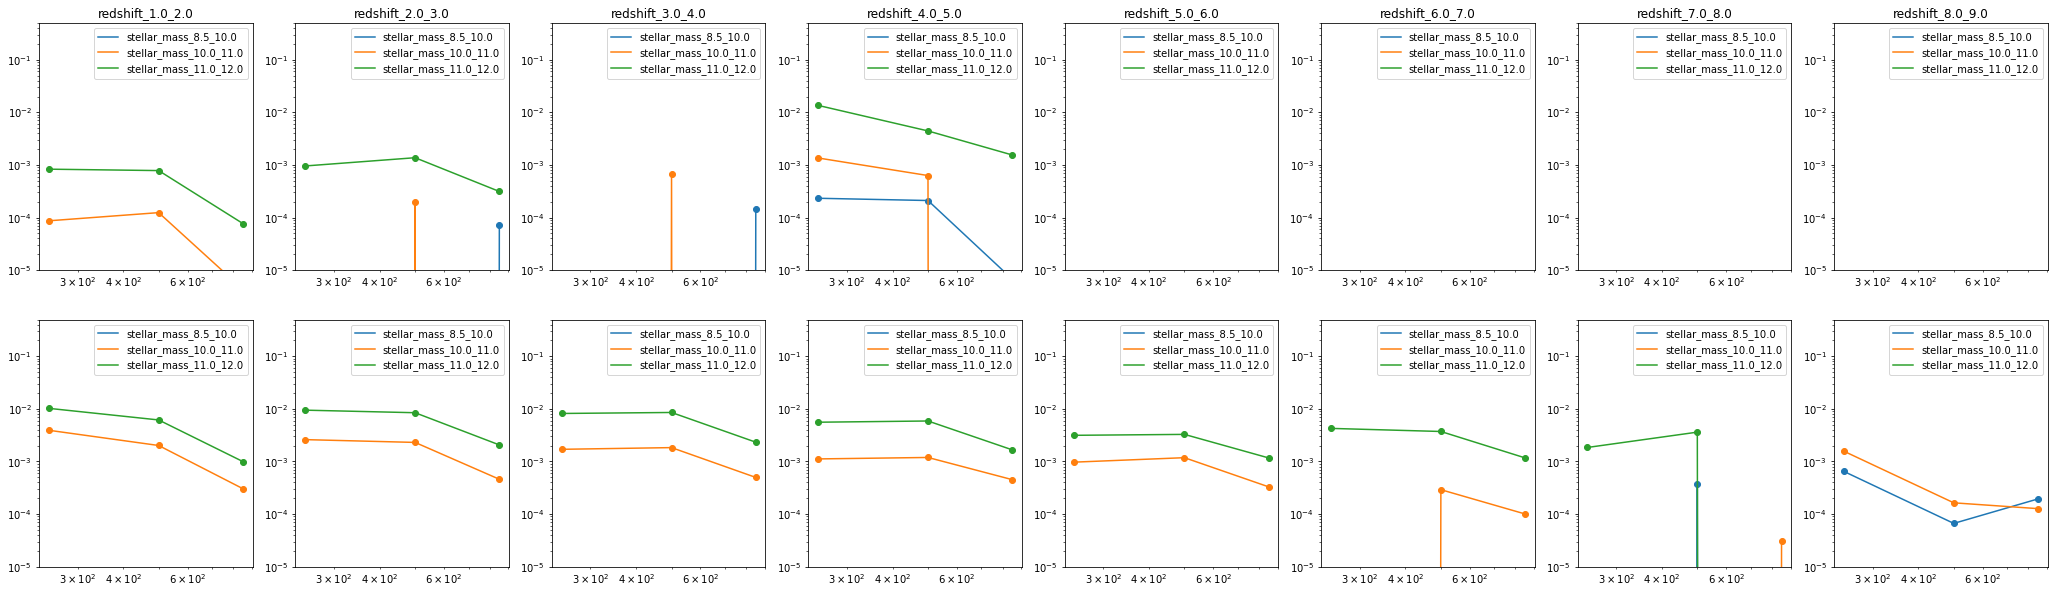

In [6]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([1e-5, 5e-1])
            axs[p, z].legend(loc='upper right')

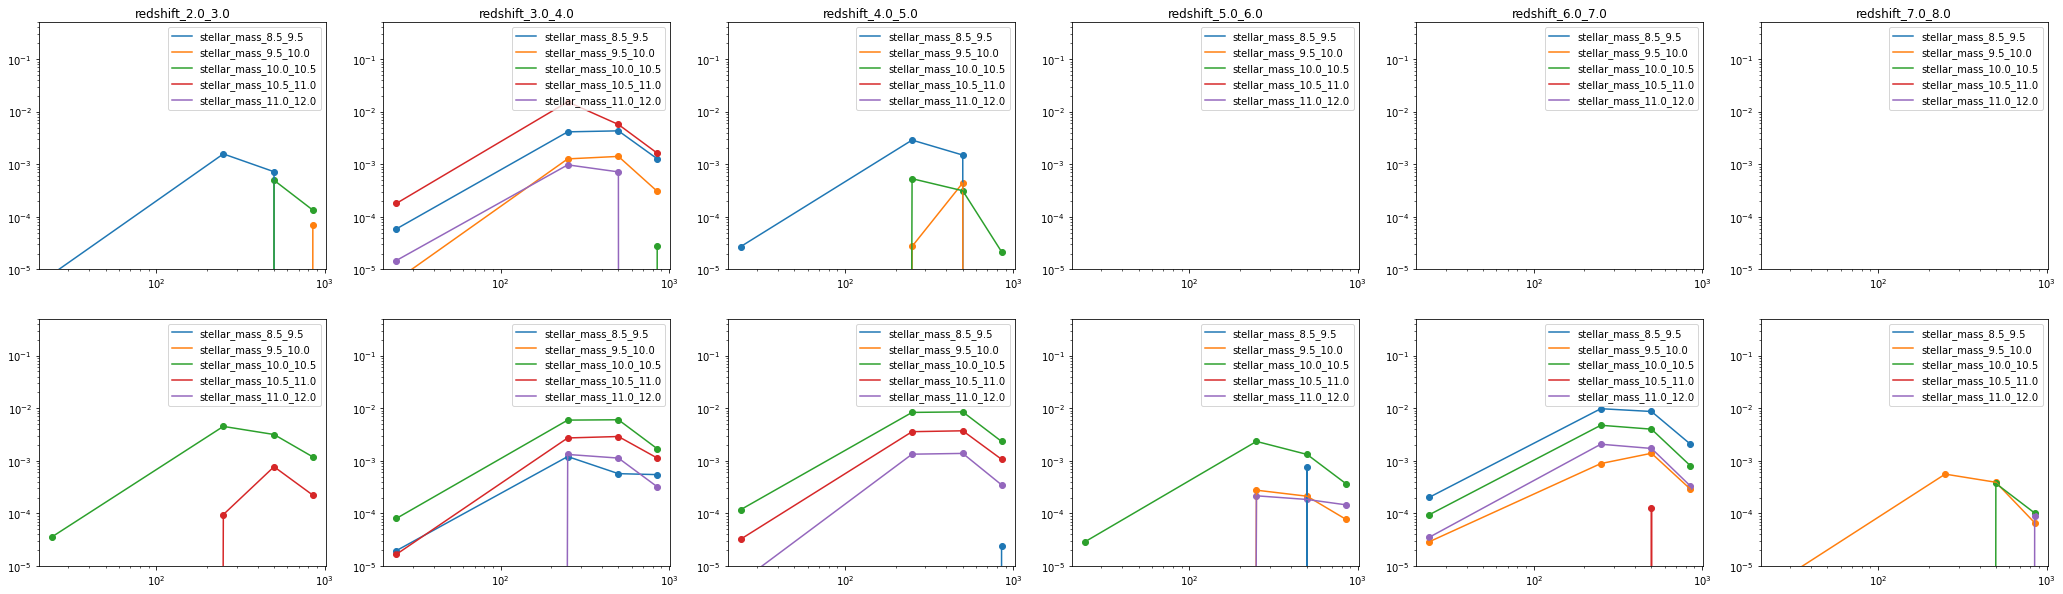

In [7]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([1e-5, 5e-1])
            axs[p, z].legend(loc='upper right')

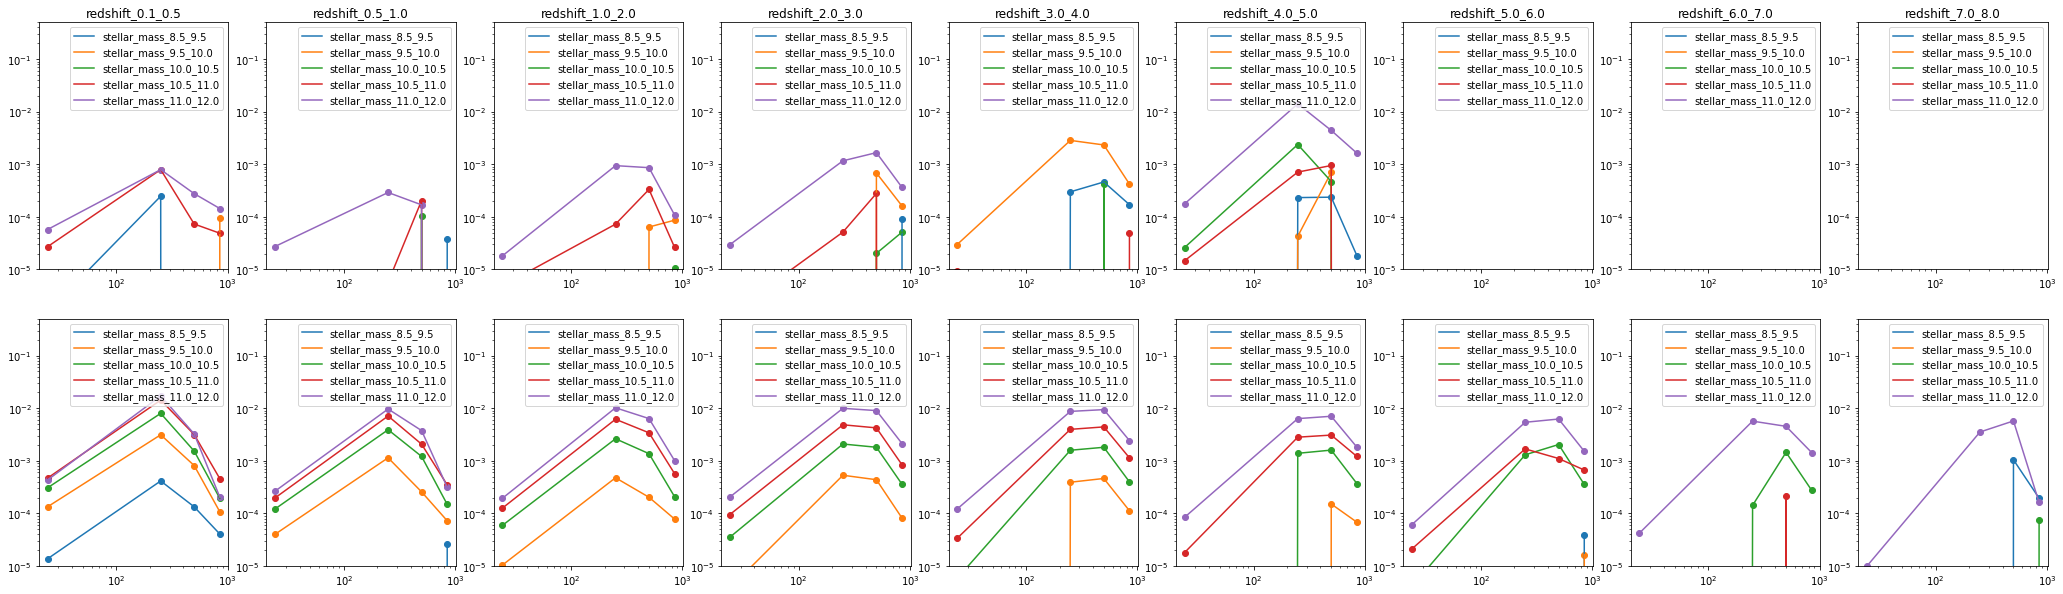

In [3]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([1e-5, 5e-1])
            axs[p, z].legend(loc='upper right')

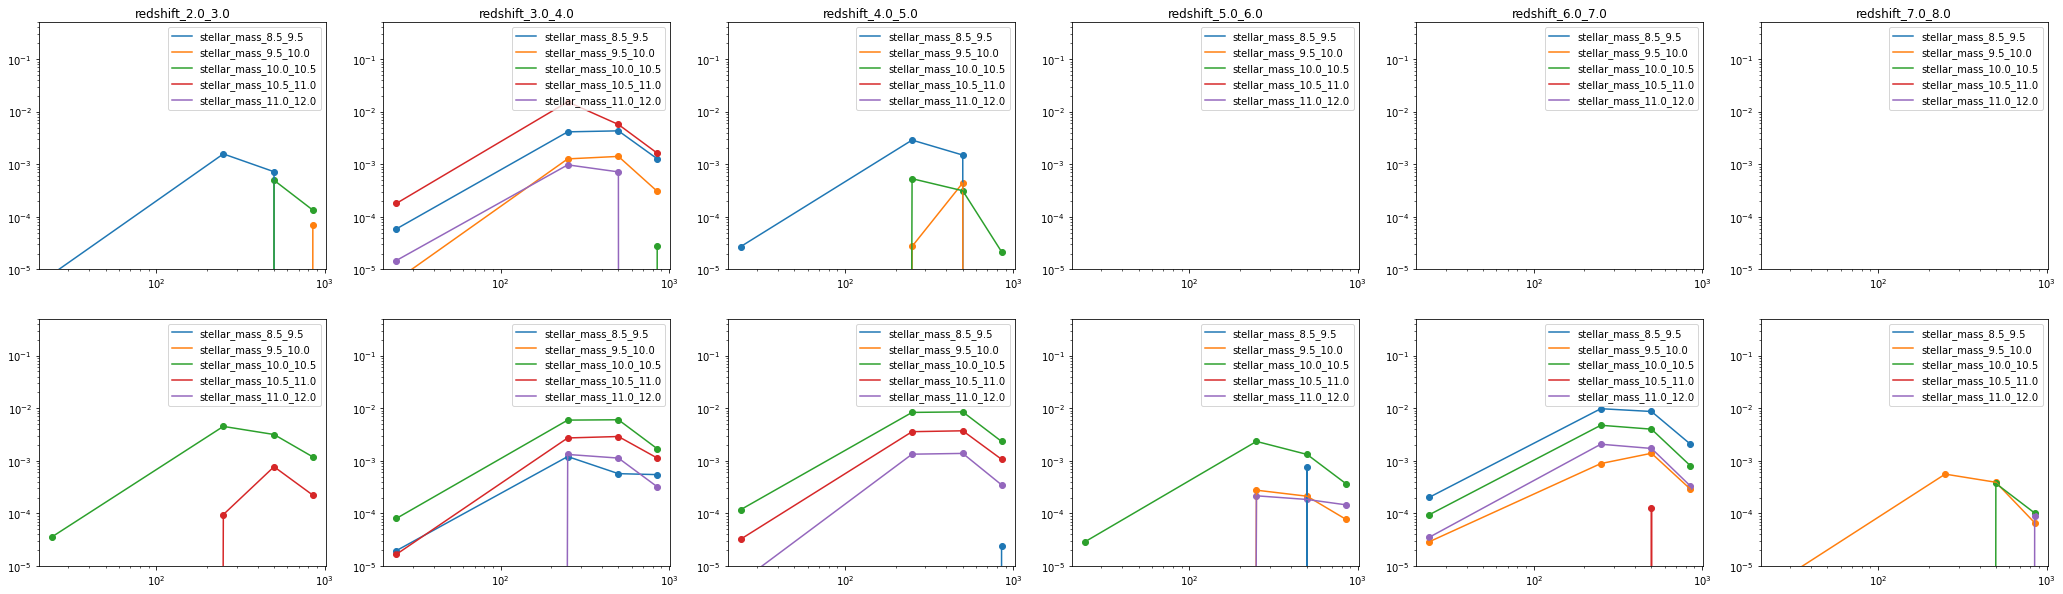

In [7]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([1e-5, 5e-1])
            axs[p, z].legend(loc='upper right')

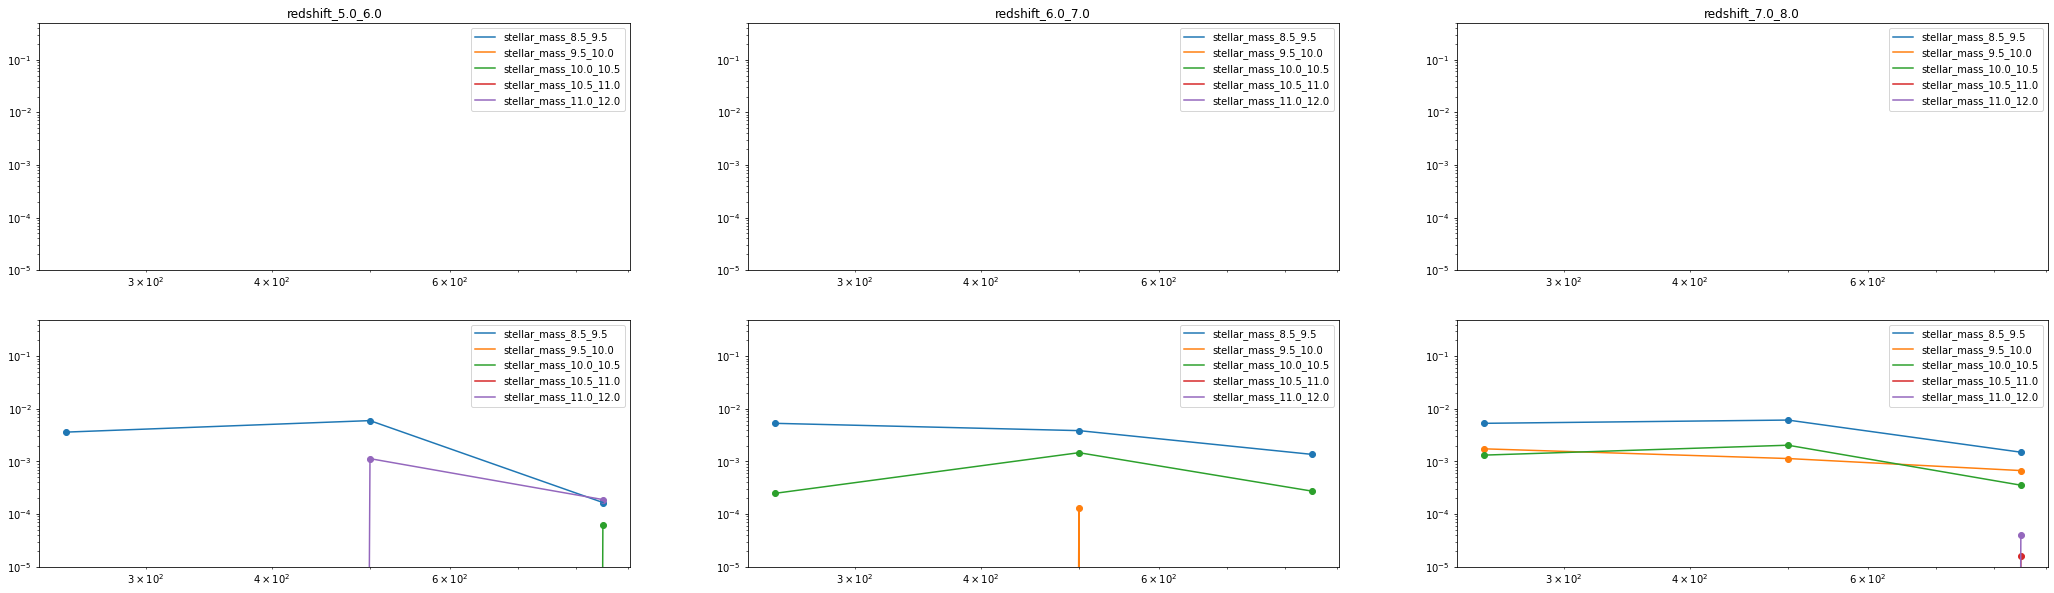

In [3]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([1e-5, 5e-1])
            axs[p, z].legend(loc='upper right')

> <ipython-input-7-1e474c47d450>(7)<module>()
      5     #
      6     pdb.set_trace()
----> 7     for p, plab in enumerate(cosmos2020.results_dict[wlab]['results_df']['flux_df']):
      8         print(p, plab)
      9         flux_df = cosmos2020.results_dict[wlab]['results_df']['flux_df'][plab]

ipdb> c
0 uvj_0
1 uvj_1
> <ipython-input-7-1e474c47d450>(6)<module>()
      4 for iwv, wlab in enumerate(['spire_psw', 'spire_plw', 'scuba_850']):
      5     #
----> 6     pdb.set_trace()
      7     for p, plab in enumerate(cosmos2020.results_dict[wlab]['results_df']['flux_df']):
      8         print(p, plab)

ipdb> c
0 uvj_0
1 uvj_1
> <ipython-input-7-1e474c47d450>(7)<module>()
      5     #
      6     pdb.set_trace()
----> 7     for p, plab in enumerate(cosmos2020.results_dict[wlab]['results_df']['flux_df']):
      8         print(p, plab)
      9         flux_df = cosmos2020.results_dict[wlab]['results_df']['flux_df'][plab]

ipdb> c
0 uvj_0
1 uvj_1


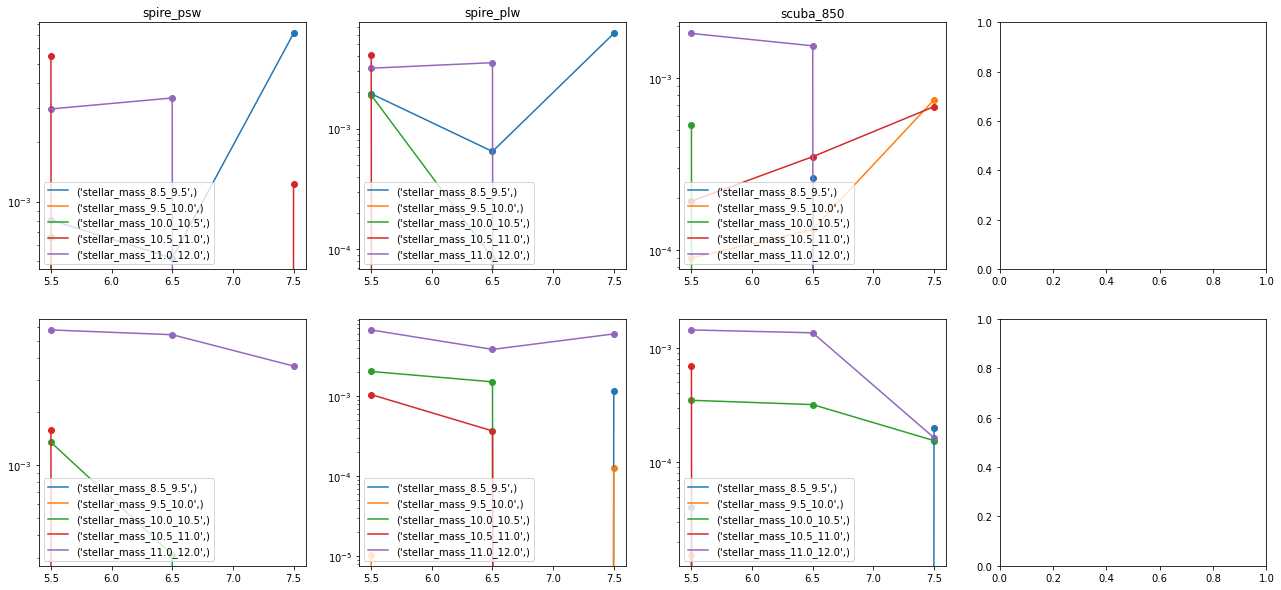

In [7]:
wlen = len(cosmos2020.results_dict)-2
plen = 2 
fig, axs = plt.subplots(plen, wlen, figsize=(22,10))
for iwv, wlab in enumerate(['spire_psw', 'spire_plw', 'scuba_850']):
    #
    pdb.set_trace()
    for p, plab in enumerate(cosmos2020.results_dict[wlab]['results_df']['flux_df']):
        print(p, plab)
        flux_df = cosmos2020.results_dict[wlab]['results_df']['flux_df'][plab]
        for mlab in flux_df:
            #pdb.set_trace()
            axs[p, iwv].scatter(flux_df[mlab].index, flux_df[mlab].values)
            axs[p, iwv].plot(flux_df[mlab].index, flux_df[mlab].values, label=mlab)
            if not p:
                axs[p, iwv].set_title(wlab)
            #axs[p, iwv].set_xscale('log')            
            axs[p, iwv].set_yscale('log')
            axs[p, iwv].legend(loc='lower left')

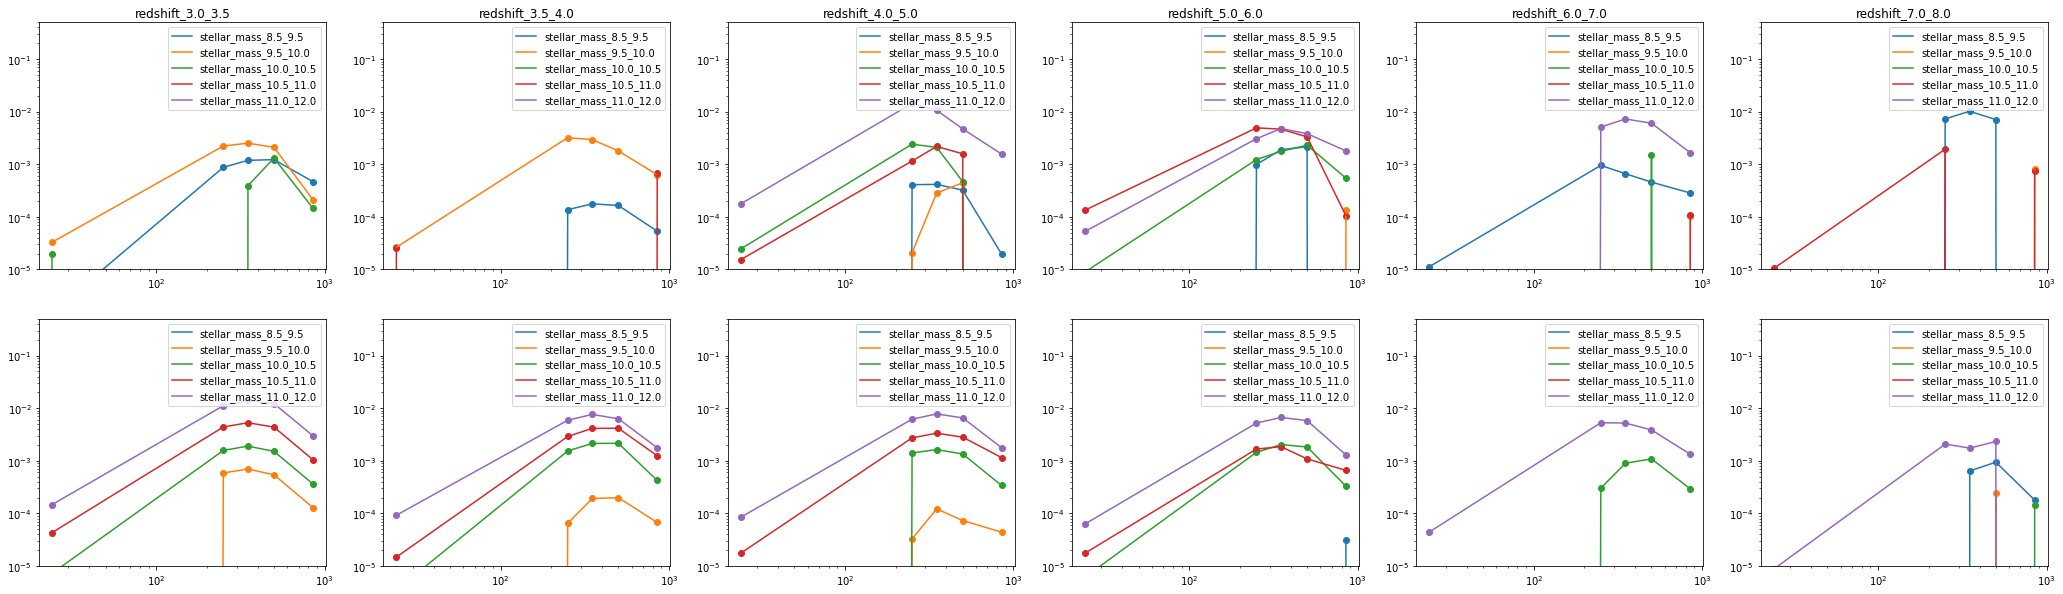

In [3]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([1e-5, 5e-1])
            axs[p, z].legend(loc='upper right')

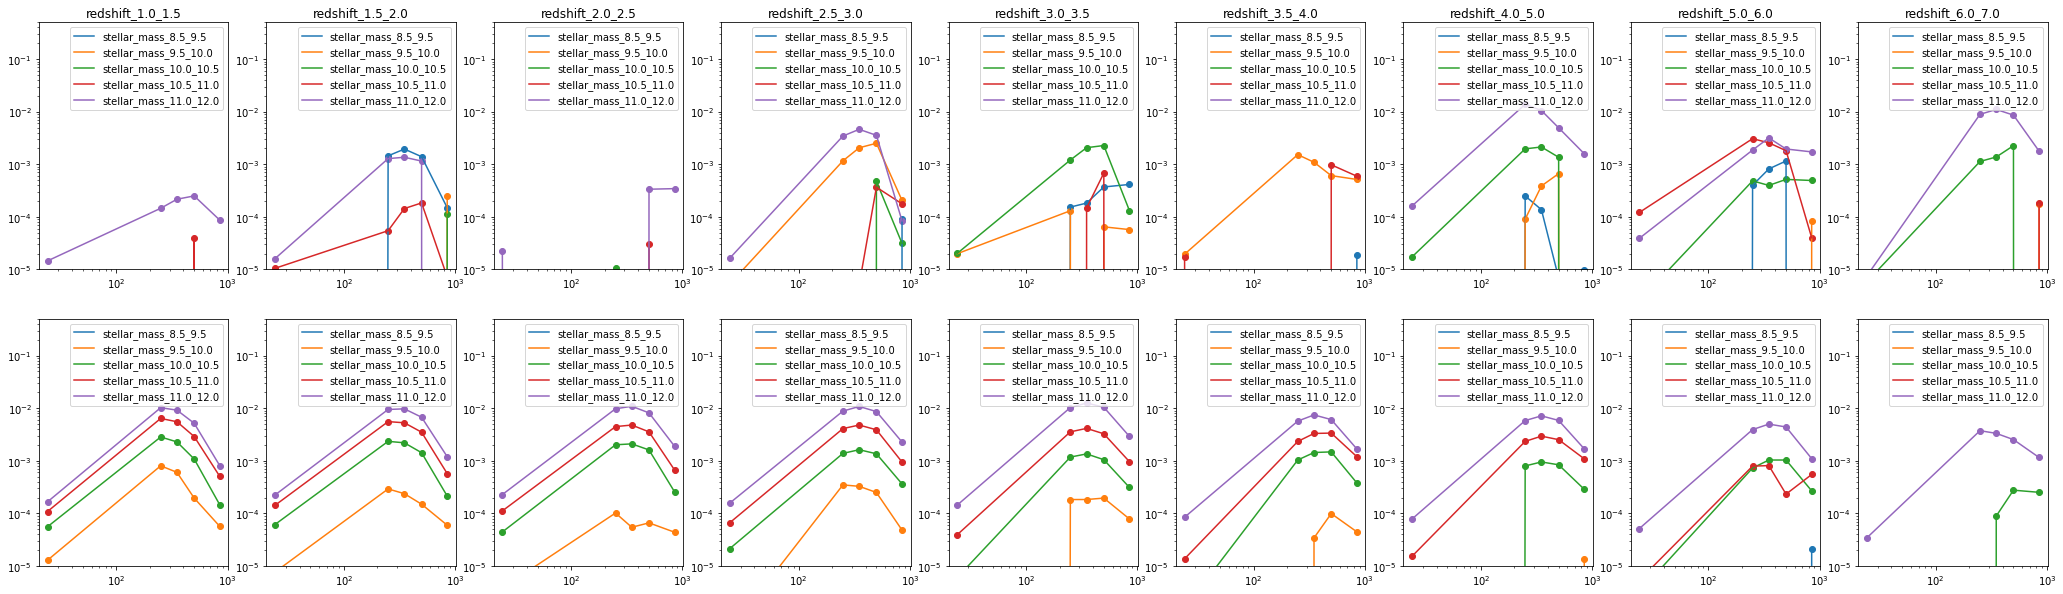

In [4]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([1e-5, 5e-1])
            axs[p, z].legend(loc='upper right')

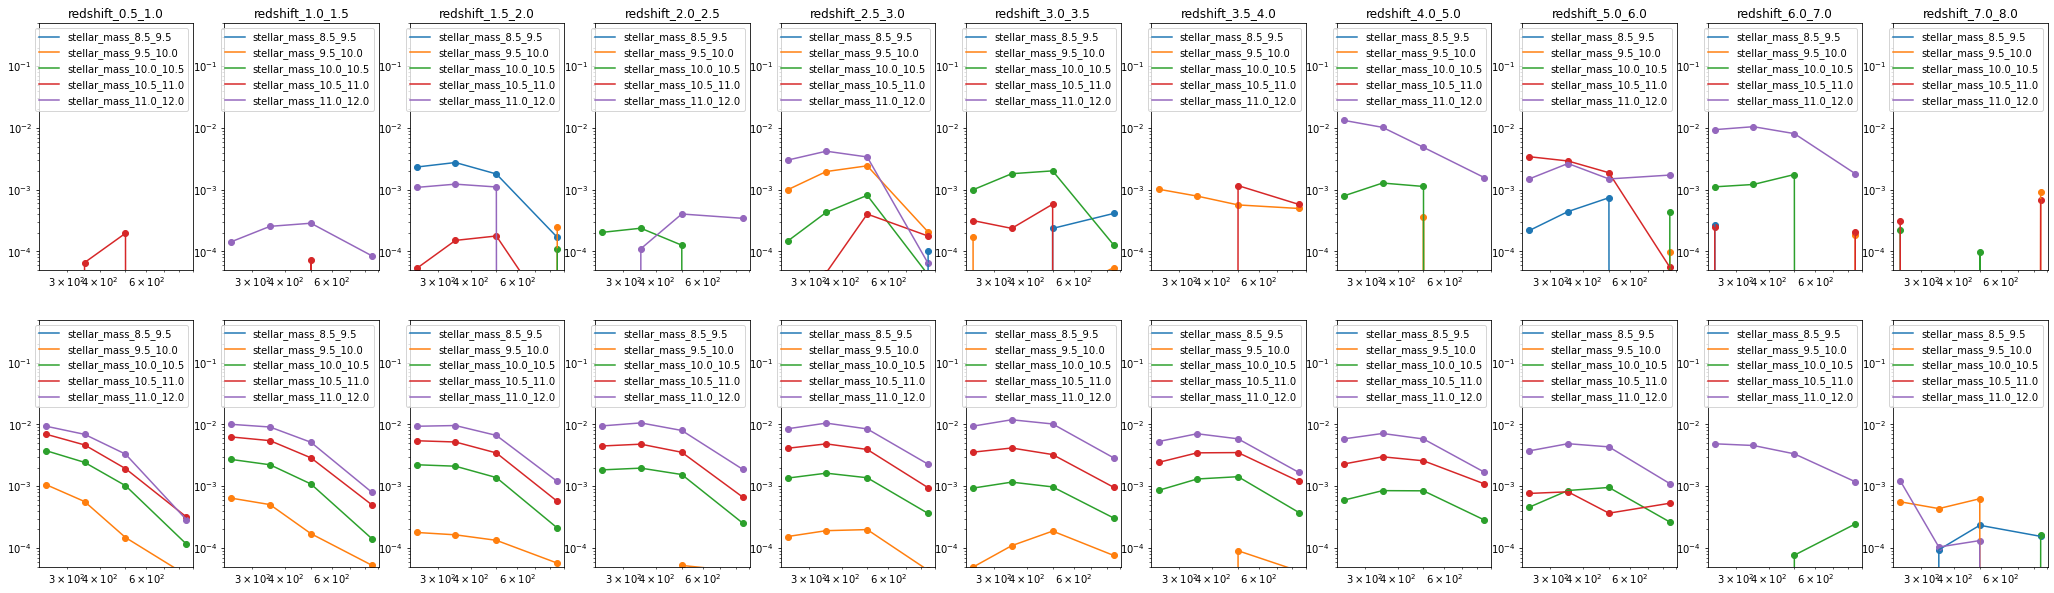

In [13]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([5e-5, 5e-1])
            axs[p, z].legend(loc='upper right')

<ipython-input-3-8de95c9414a7>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-3-8de95c9414a7>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-3-8de95c9414a7>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-3-8de95c9414a7>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-3-8de95c9414a7>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-3-8de95c9414a7>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-3-8de95c9414a7>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')

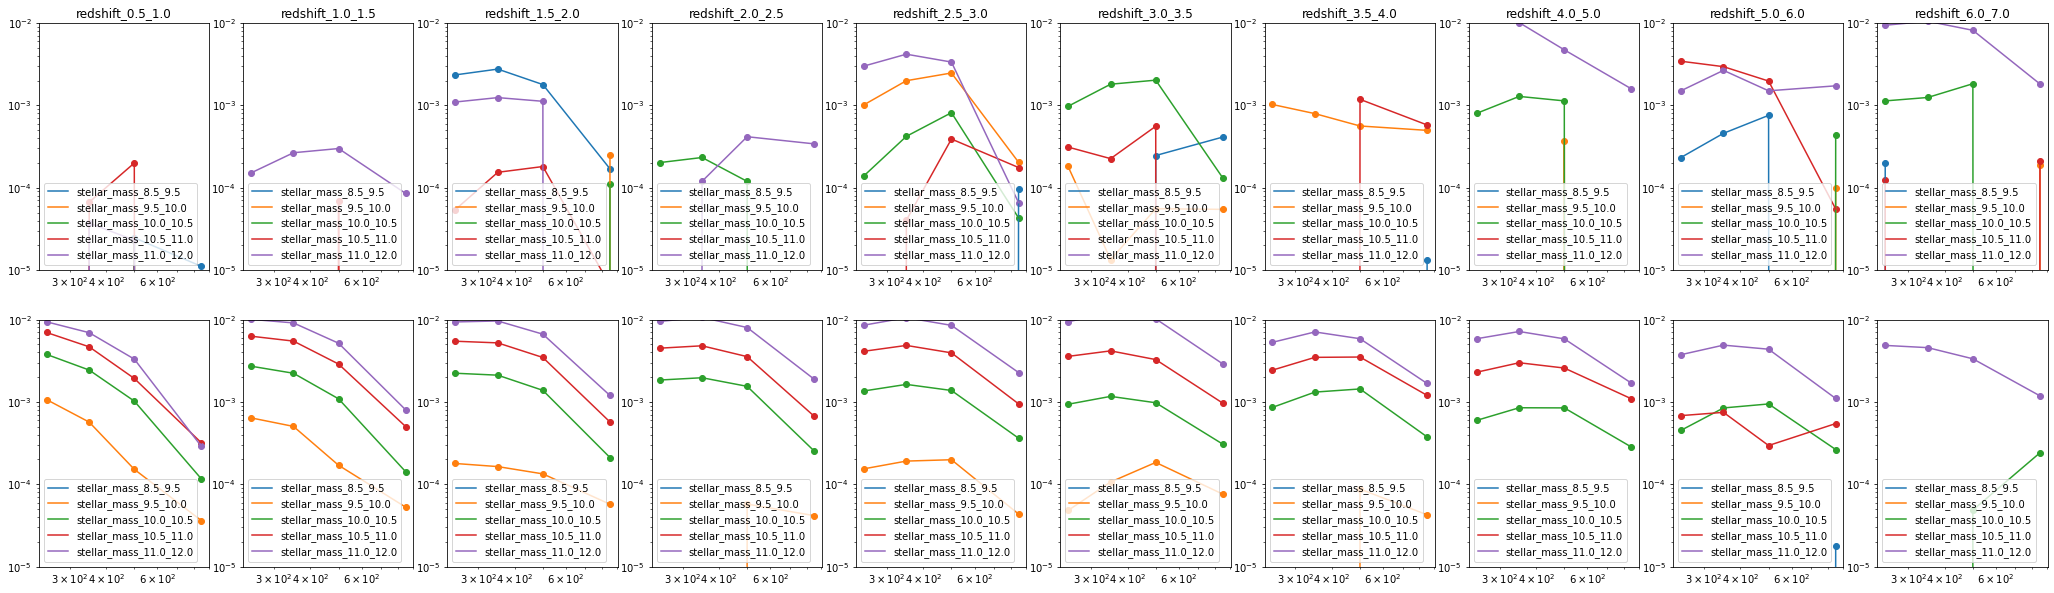

In [3]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([1e-5, 1e-2])
            axs[p, z].legend(loc='lower left')

<ipython-input-6-8de95c9414a7>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-6-8de95c9414a7>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-6-8de95c9414a7>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-6-8de95c9414a7>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-6-8de95c9414a7>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-6-8de95c9414a7>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-6-8de95c9414a7>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')

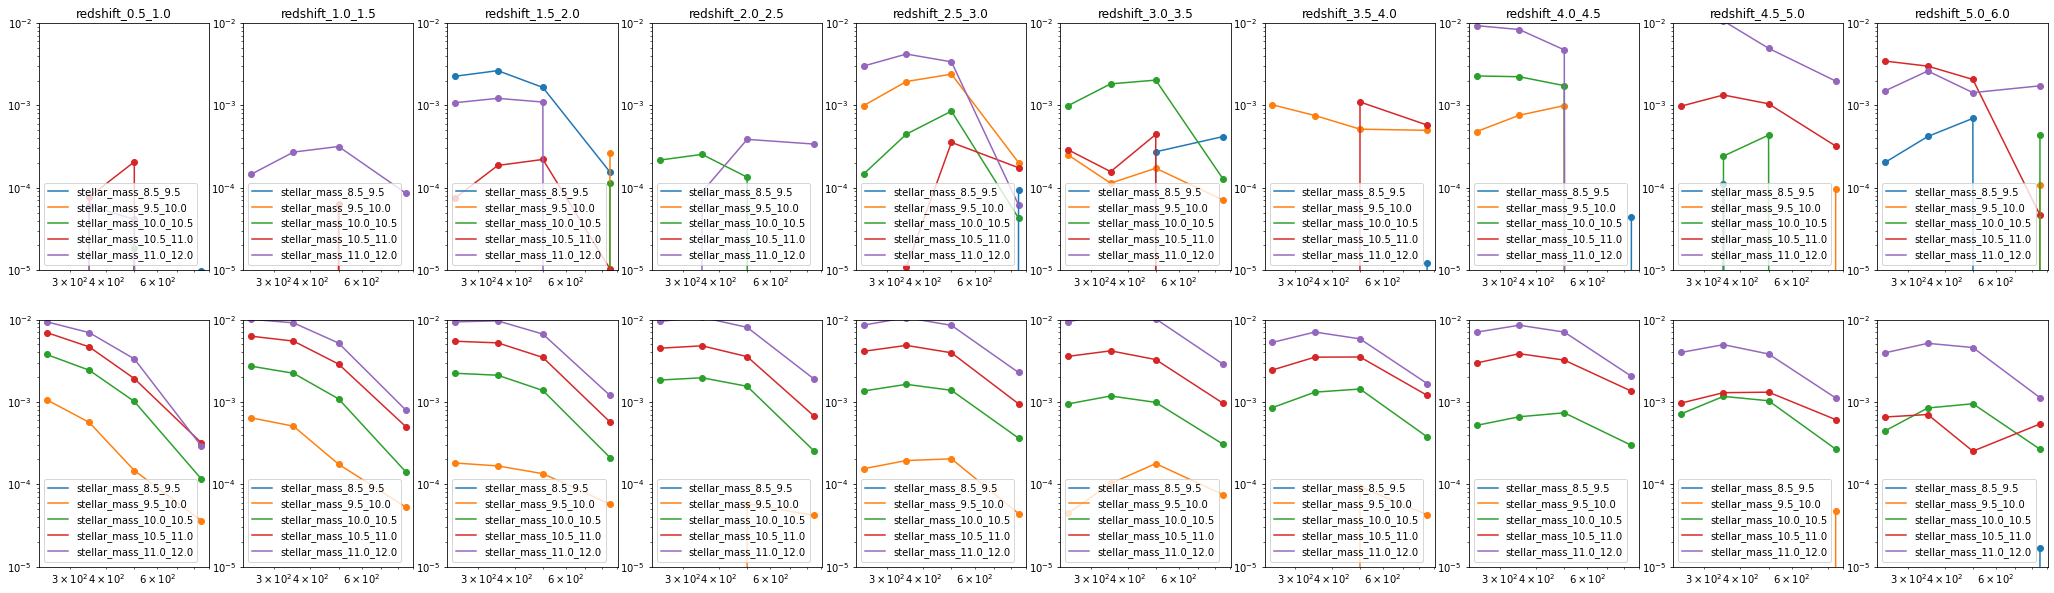

In [6]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([1e-5, 1e-2])
            axs[p, z].legend(loc='lower left')

<ipython-input-4-bb69408489d8>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-4-bb69408489d8>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-4-bb69408489d8>:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].scatter(sed.index, sed[mlab])
<ipython-input-4-bb69408489d8>:9: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].scatter(sed.index, sed[mlab])
<ipython-input-4-bb69408489d8>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-4-bb69408489d8>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-4-bb69408489d8>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p

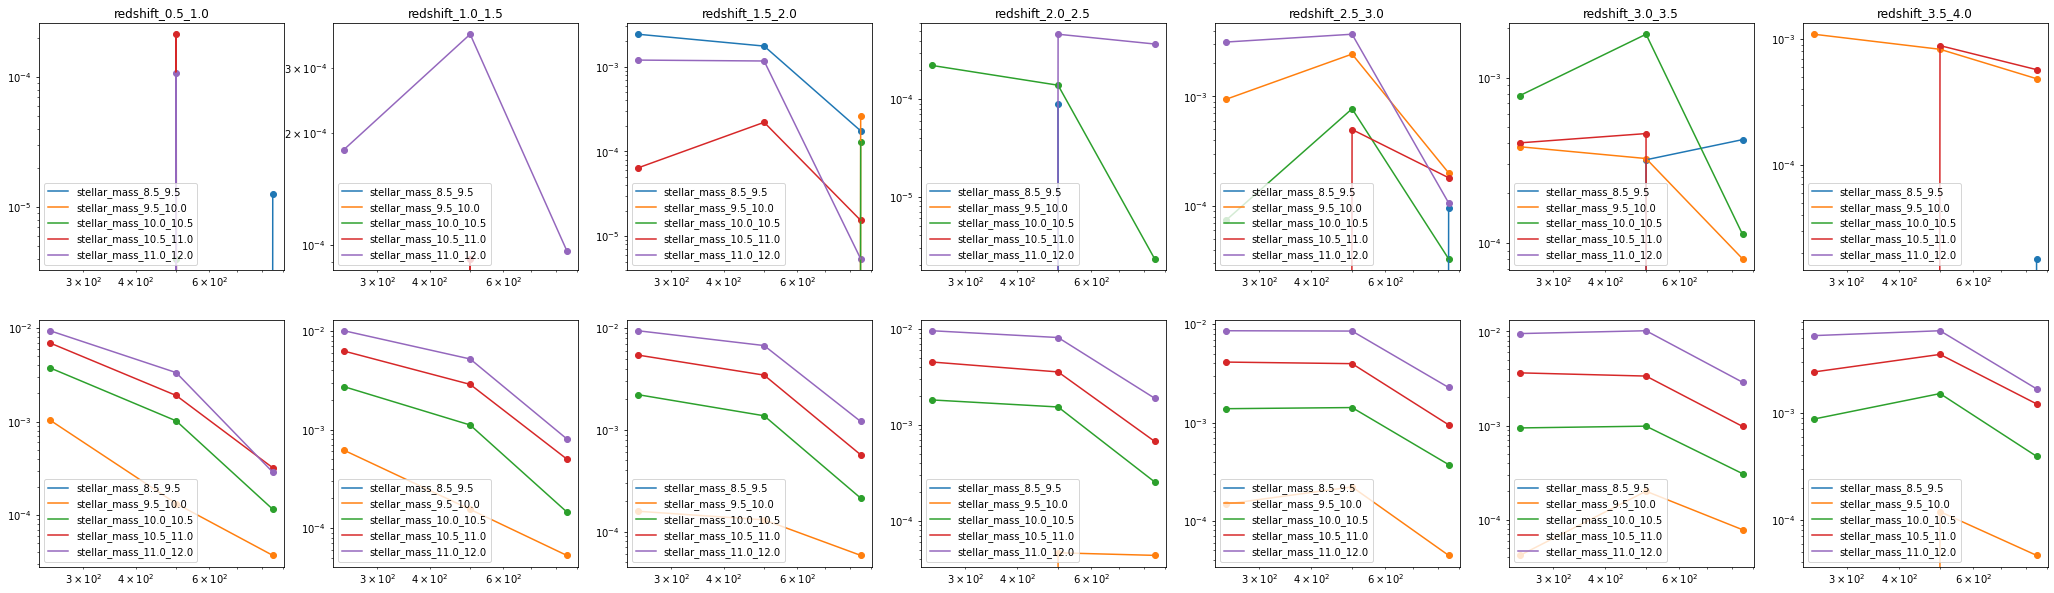

In [4]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].set_ylim([1e-5, 1e-2])
            axs[p, z].legend(loc='lower left')

In [ ]:
path_ini_file = os.path.join("examples","cosmos2020_highz.ini")
cosmos2020 = SimstackWrapper(path_ini_file, read_maps=True, read_catalog=True, stack_automatically=True)
cosmos2020.parse_results()

Simultaneously Stacking 70 Layers in spire_psw
Simultaneously Stacking 70 Layers in spire_plw
Simultaneously Stacking 70 Layers in scuba_850


<ipython-input-6-ed005d37059a>:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[z].set_yscale('log')
<ipython-input-6-ed005d37059a>:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[z].set_yscale('log')


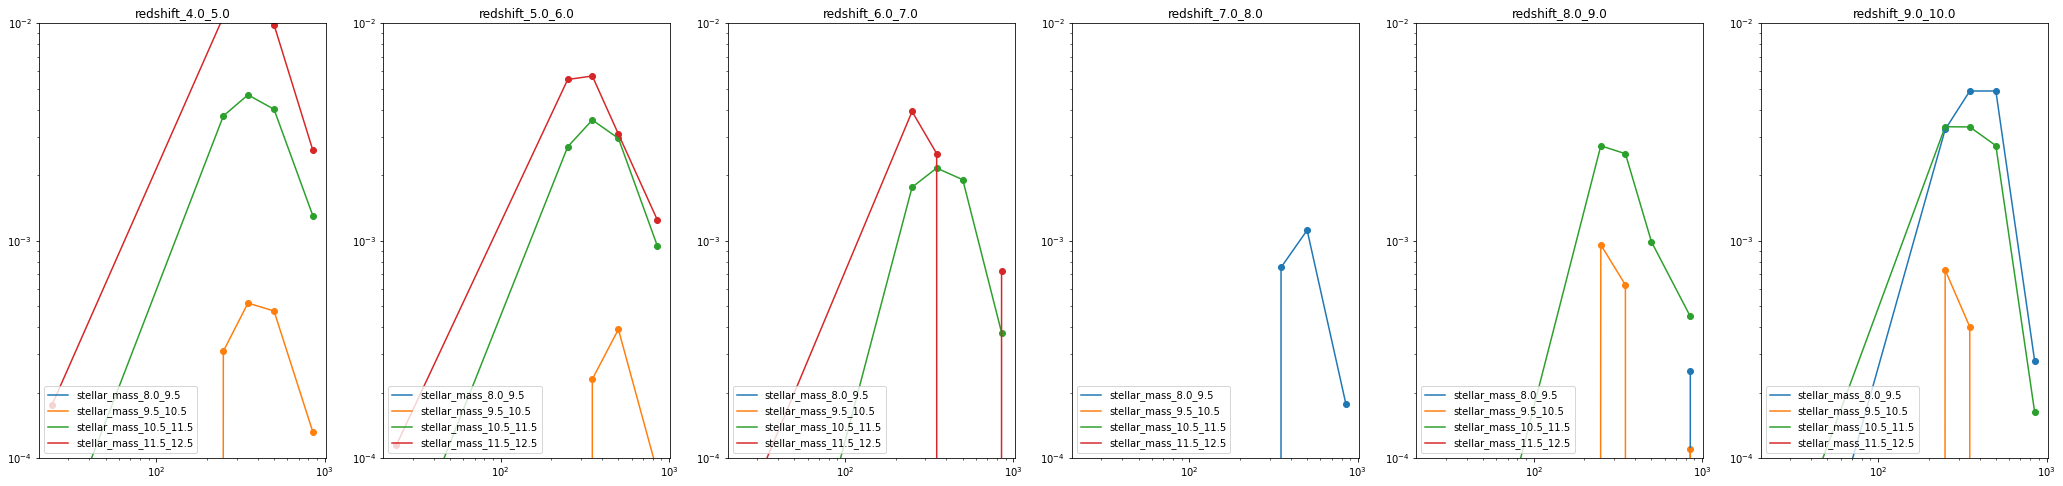

In [6]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 1
fig, axs = plt.subplots(plen, zlen, figsize=(36,8))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab]
        for mlab in sed:
            axs[z].scatter(sed.index, sed[mlab])
            axs[z].plot(sed.index, sed[mlab], label=mlab)
            
            axs[z].set_title(zlab)
            axs[z].set_xscale('log')            
            axs[z].set_yscale('log')
            axs[z].set_ylim([1e-4, 1e-2])
            axs[z].legend(loc='lower left')

In [ ]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 1
fig, axs = plt.subplots(plen, zlen, figsize=(36,8))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab]
        for mlab in sed:
            axs[z].scatter(sed.index, sed[mlab])
            axs[z].plot(sed.index, sed[mlab], label=mlab)
            
            axs[z].set_title(zlab)
            axs[z].set_xscale('log')            
            axs[z].set_yscale('log')
            axs[z].set_ylim([1e-4, 1e-2])
            axs[z].legend(loc='lower left')

In [24]:
cosmos2020.split_table['table'].groupby('xray').count()

ra     dec  redshift  stellar_mass
xray                                        
0     710077  710077    200875        254692
1       8523    8523         0          4011

In [22]:
np.unique(cosmos2020.split_table['table']['xray'])

array([0, 1], dtype=int64)

In [21]:
cosmos2020.config_dict['catalog'].keys()

dict_keys(['path', 'file', 'astrometry', 'classification'])

In [11]:
pd.cut(cosmos2020.catalog_dict['table'])

ALPHA_J2000  DELTA_J2000  lp_mass_med  ez_restU-V  ez_restV-J  \
lp_zBEST                                                                  
0.0000           8523         8523         8523        4557        4552   
0.0201             16           16           16           3           3   
0.0202              8            8            8           0           0   
0.0203              9            9            9           1           1   
0.0204              8            8            8           2           2   
...               ...          ...          ...         ...         ...   
9.9109              1            1            1           1           1   
9.9296              1            1            1           1           1   
9.9644              1            1            1           1           1   
9.9757              1            1            1           0           0   
9.9771              2            2            2           1           1   

          lp_sSFR_med  lp_type  
lp_zBEST                        
0.0000           8523     8523  
0.0201             16       16  
0.0202              8        8  
0.0203              9        9  
0.0204              8        8  
...               ...      ...  
9.9109              1        1  
9.9296              1        1  
9.9644              1        1  
9.9757              1        1  
9.9771              2        2  

[54695 rows x 7 columns]

In [9]:
cosmos2020.catalog_dict['table'].groupby('lp_type').count()

ALPHA_J2000  DELTA_J2000  lp_zBEST  lp_mass_med  ez_restU-V  \
lp_type                                                                
0             710077       710077    710077       710077      671409   
1               8523         8523      8523         8523        4557   

         ez_restV-J  lp_sSFR_med  
lp_type                           
0            671291       710077  
1              4552         8523

<ipython-input-3-bb69408489d8>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-3-bb69408489d8>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')


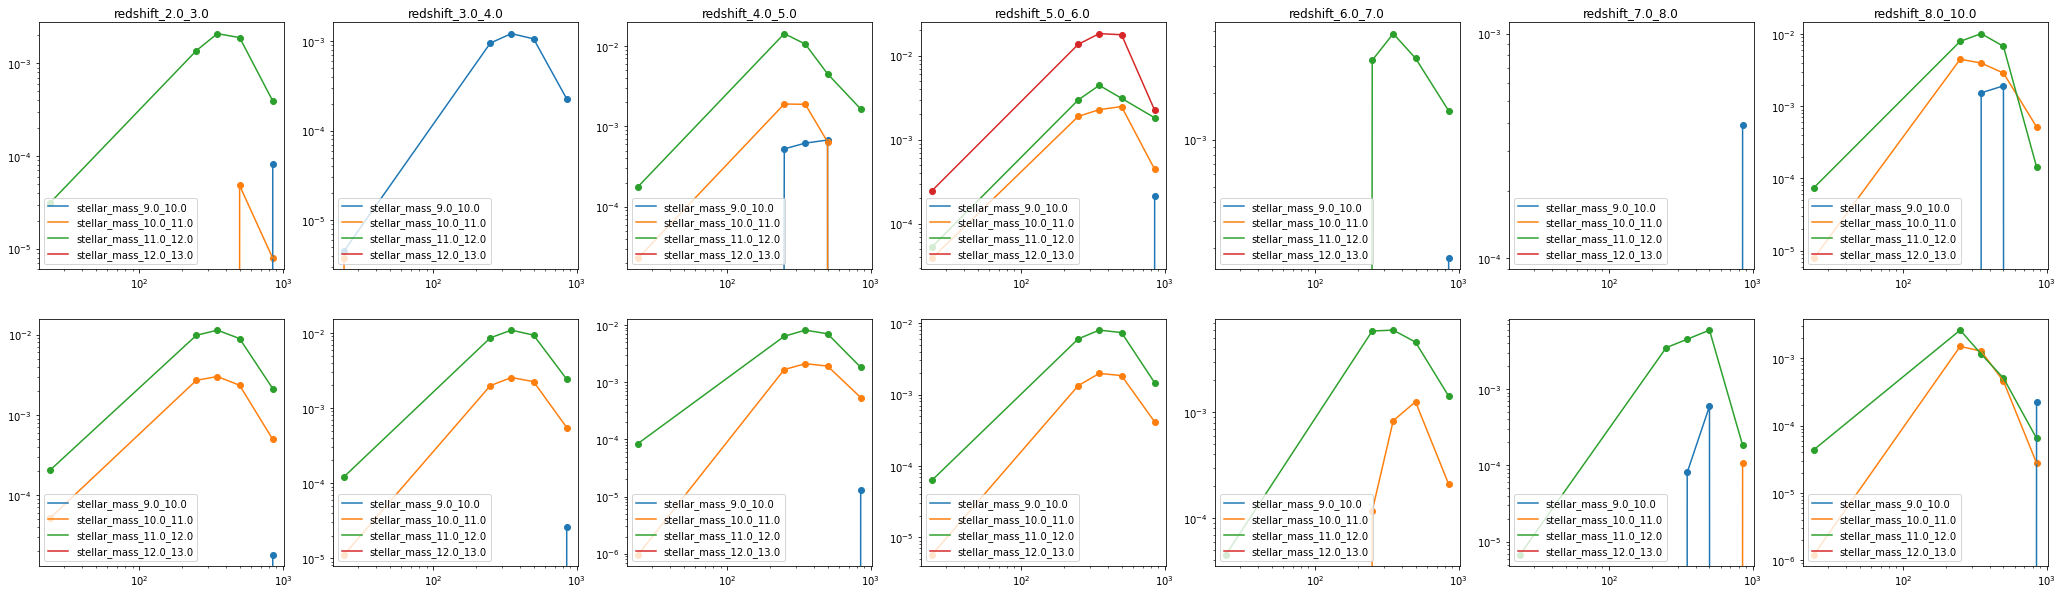

In [3]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].legend(loc='lower left')

0 uvj_0
1 uvj_1
0 uvj_0
1 uvj_1
0 uvj_0
1 uvj_1
0 uvj_0


<ipython-input-4-252999d32f81>:17: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, iwv].set_yscale('log')
<ipython-input-4-252999d32f81>:17: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, iwv].set_yscale('log')


1 uvj_1
0 uvj_0
1 uvj_1


TypeError: list indices must be integers or slices, not str

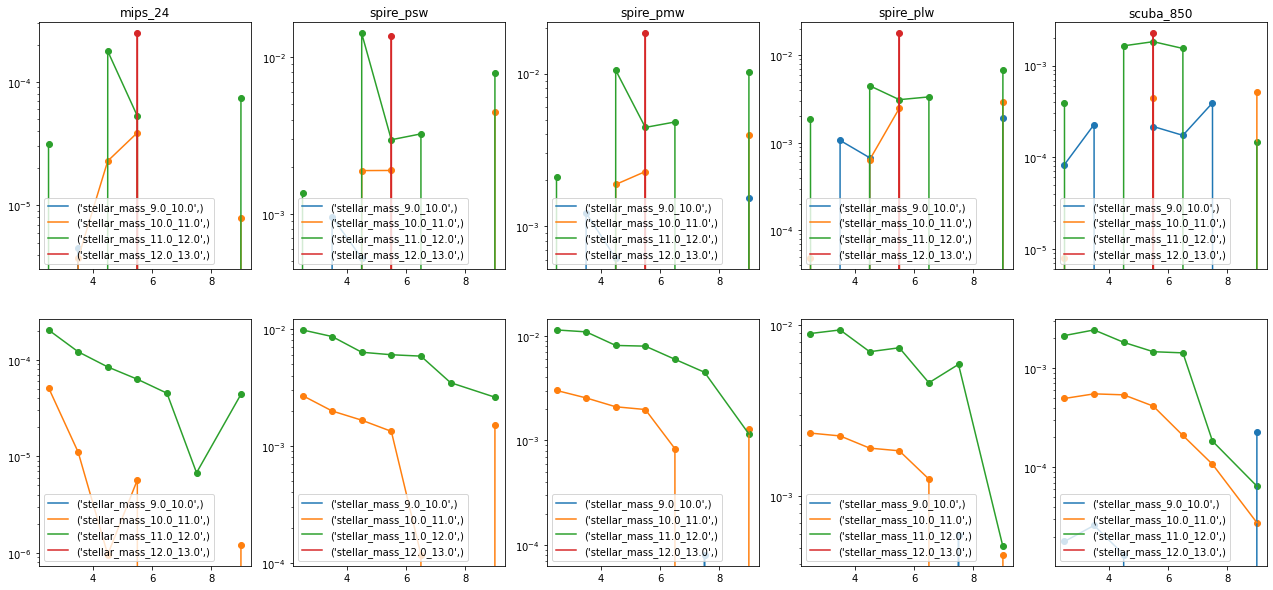

In [4]:
wlen = len(cosmos2020.results_dict)-2
plen = 2 
fig, axs = plt.subplots(plen, wlen, figsize=(22,10))
for iwv, wlab in enumerate(cosmos2020.results_dict):
    #
    #pdb.set_trace()
    for p, plab in enumerate(cosmos2020.results_dict[wlab]['results_df']['flux_df']):
        print(p, plab)
        flux_df = cosmos2020.results_dict[wlab]['results_df']['flux_df'][plab]
        for mlab in flux_df:
            #pdb.set_trace()
            axs[p, iwv].scatter(flux_df[mlab].index, flux_df[mlab].values)
            axs[p, iwv].plot(flux_df[mlab].index, flux_df[mlab].values, label=mlab)
            if not p:
                axs[p, iwv].set_title(wlab)
            #axs[p, iwv].set_xscale('log')            
            axs[p, iwv].set_yscale('log')
            axs[p, iwv].legend(loc='lower left')

In [31]:
path_ini_file = os.path.join("examples","cosmos2020.ini")
cosmos2020_z8 = SimstackWrapper(path_ini_file, read_maps=True, read_catalog=True, stack_automatically=True)
cosmos2020_z8.parse_results()

Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultan

In [2]:
path_ini_file = os.path.join("examples","cosmos2020.ini")
cosmos2020_z9 = SimstackWrapper(path_ini_file, read_maps=True, read_catalog=True, stack_automatically=True)
cosmos2020_z9.parse_results()

Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultaneously = 10
Number of Layers Stacking Simultan

In [29]:
zlen = len(cosmos2020.results_dict['SED_df']['flux_density'])
plen = 2 #len(cosmos2020.results_dict['SED_df']['flux_density'])

<ipython-input-30-39be1402f48d>:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-30-39be1402f48d>:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-30-39be1402f48d>:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-30-39be1402f48d>:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-30-39be1402f48d>:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-30-39be1402f48d>:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-30-39be1402f48d>:12: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale

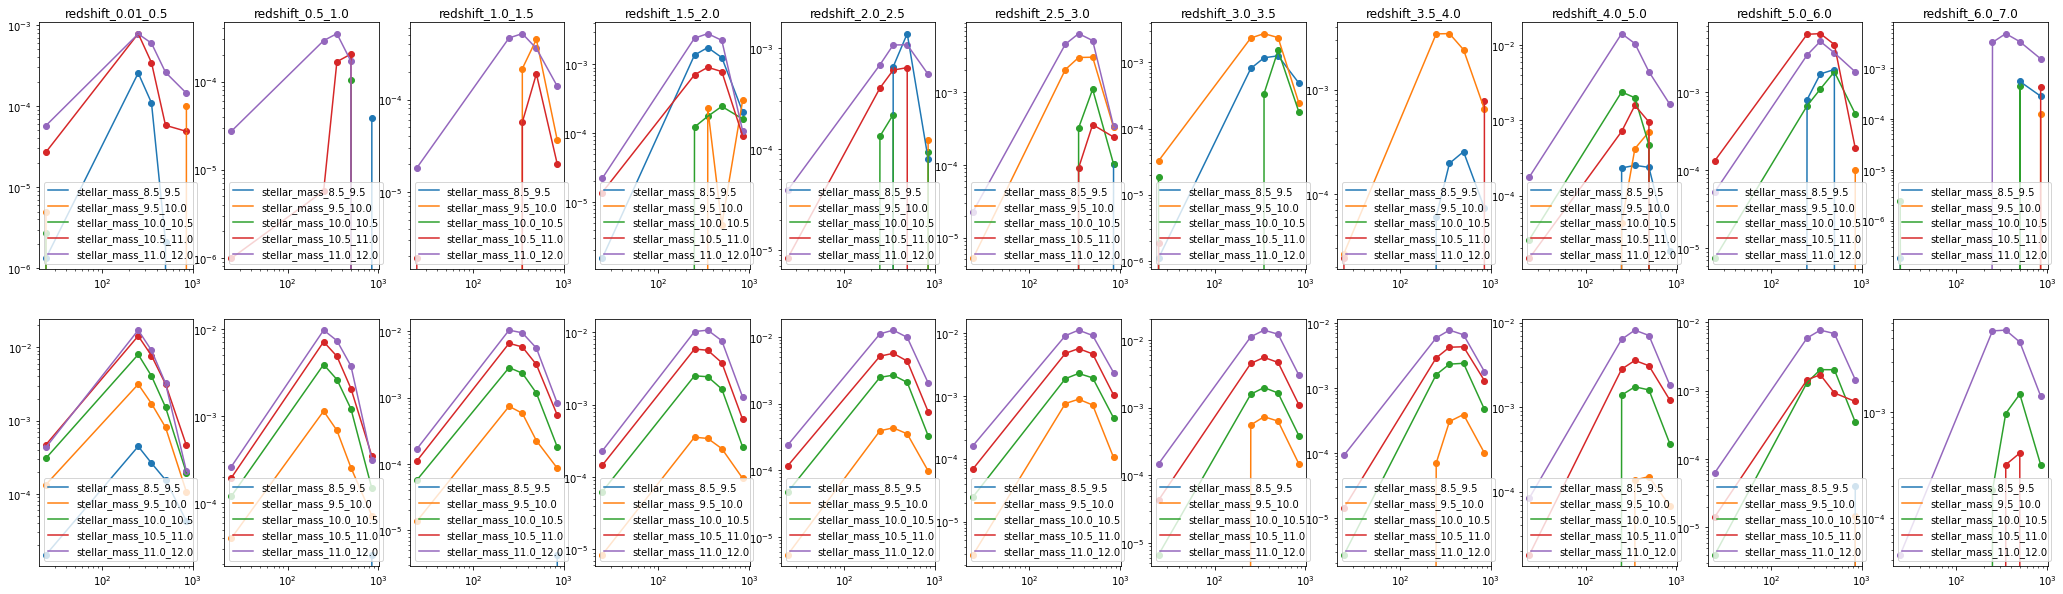

In [30]:
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].legend(loc='lower left')

<ipython-input-3-3c5015f8298c>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-3-3c5015f8298c>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-3-3c5015f8298c>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-3-3c5015f8298c>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-3-3c5015f8298c>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-3-3c5015f8298c>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')
<ipython-input-3-3c5015f8298c>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[p, z].set_yscale('log')

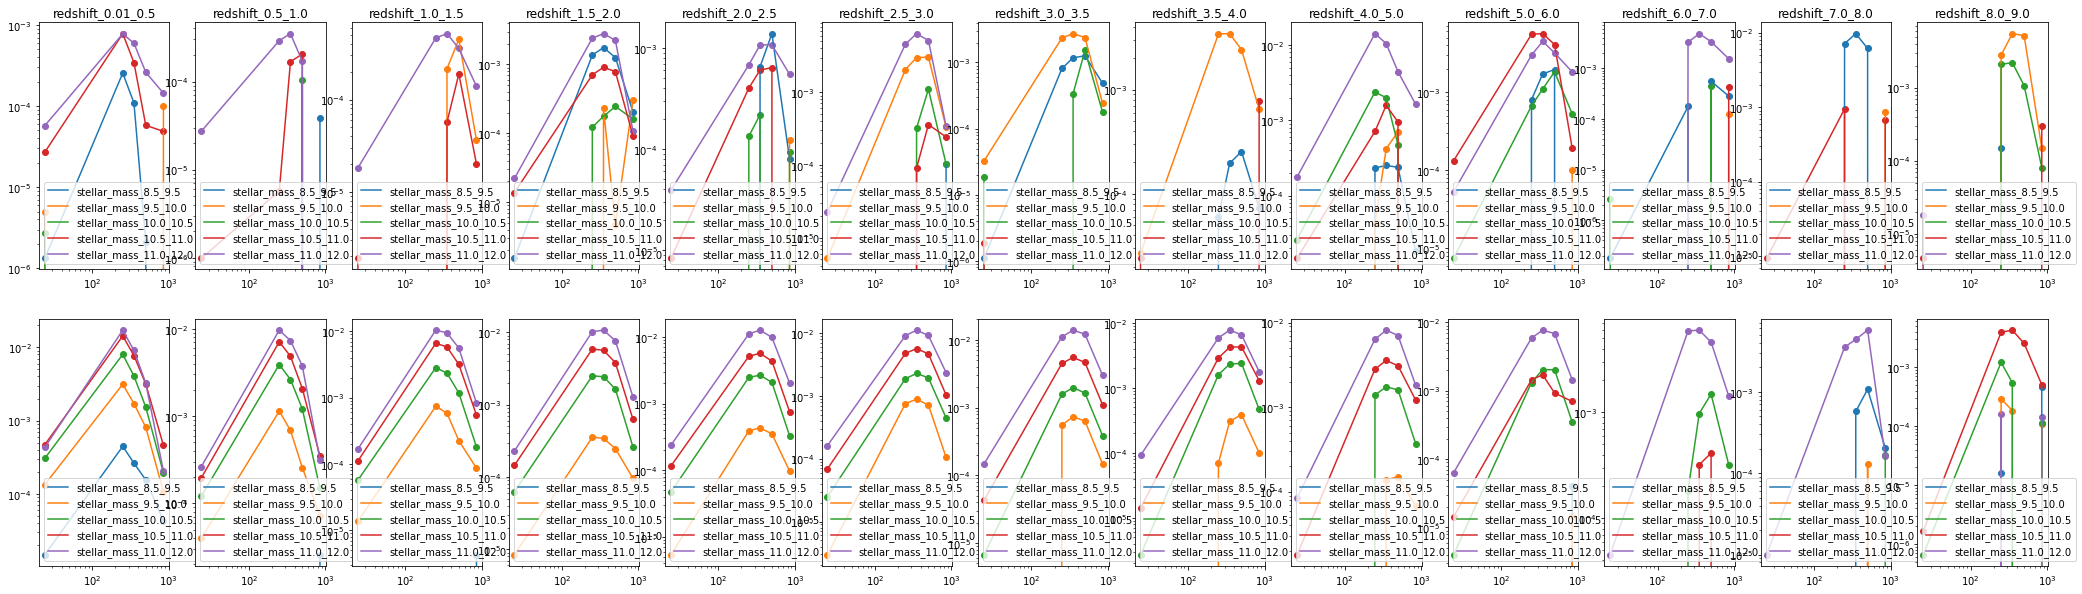

In [3]:
zlen = len(cosmos2020_z9.results_dict['SED_df']['flux_density'])
plen = 2 
fig, axs = plt.subplots(plen, zlen, figsize=(36,10))
for z, zlab in enumerate(cosmos2020_z9.results_dict['SED_df']['flux_density']):
    for p, plab in enumerate(cosmos2020_z9.results_dict['SED_df']['flux_density'][zlab]):
        #pdb.set_trace()
        sed = cosmos2020_z9.results_dict['SED_df']['flux_density'][zlab][plab]
        for mlab in sed:
            axs[p, z].scatter(sed.index, sed[mlab])
            axs[p, z].plot(sed.index, sed[mlab], label=mlab)
            if not p:
                axs[p, z].set_title(zlab)
            axs[p, z].set_xscale('log')            
            axs[p, z].set_yscale('log')
            axs[p, z].legend(loc='lower left')

0 uvj_0
1 uvj_1
0 uvj_0
1 uvj_1
0 uvj_0
1 uvj_1
0 uvj_0
1 uvj_1
0 uvj_0
1 uvj_1


TypeError: list indices must be integers or slices, not str

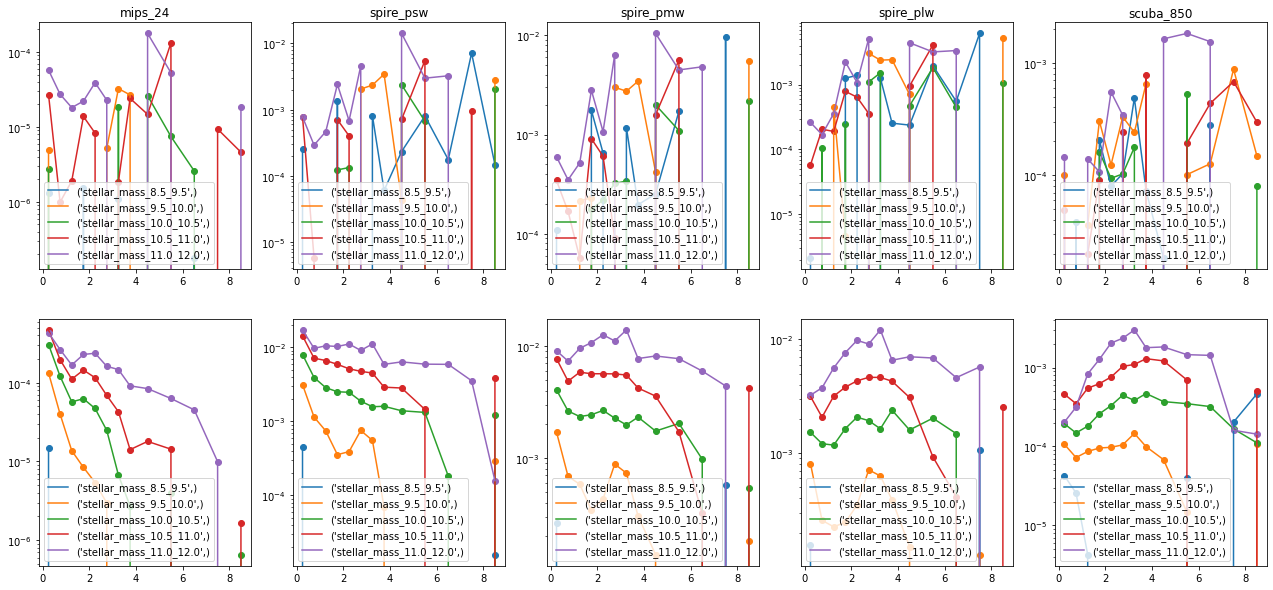

In [11]:
wlen = len(cosmos2020_z9.results_dict)-2
plen = 2 
fig, axs = plt.subplots(plen, wlen, figsize=(22,10))
for iwv, wlab in enumerate(cosmos2020_z9.results_dict):
    #
    #pdb.set_trace()
    for p, plab in enumerate(cosmos2020_z9.results_dict[wlab]['results_df']['flux_df']):
        print(p, plab)
        flux_df = cosmos2020_z9.results_dict[wlab]['results_df']['flux_df'][plab]
        for mlab in flux_df:
            #pdb.set_trace()
            axs[p, iwv].scatter(flux_df[mlab].index, flux_df[mlab].values)
            axs[p, iwv].plot(flux_df[mlab].index, flux_df[mlab].values, label=mlab)
            if not p:
                axs[p, iwv].set_title(wlab)
            #axs[p, iwv].set_xscale('log')            
            axs[p, iwv].set_yscale('log')
            axs[p, iwv].legend(loc='lower left')

In [26]:
print(np.unique(cosmos2020_z9.split_table['table']['redshift'].dropna()))
print(np.unique(cosmos2020_z9.split_table['table']['stellar_mass'].dropna()))
cosmos2020_z9.split_table['table'][(cosmos2020_z9.split_table['table']['redshift'] == 12)]
cosmos2020_z9.split_table['table'][(cosmos2020_z9.split_table['table']['redshift'] == 12) & (cosmos2020_z9.split_table['table']['stellar_mass'] == 4)]

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
[0. 1. 2. 3. 4.]


ra       dec  redshift  stellar_mass  uvj
251858  150.082307  2.034585      12.0           4.0    0
281724  150.525878  2.081718      12.0           4.0    0
506128  150.418856  2.442049      12.0           4.0    1
506807  150.415349  2.444019      12.0           4.0    1
667306  150.095578  2.721117      12.0           4.0    1
718284  149.717739  2.793962      12.0           4.0    1

In [5]:
wlen = len(cosmos2020.results_dict)-2
plen = 2 
fig, axs = plt.subplots(plen, wlen, figsize=(22,10))
for iwv, wlab in enumerate(cosmos2020.results_dict):
    #
    #pdb.set_trace()
    for p, plab in enumerate(cosmos2020.results_dict[wlab]['results_df']['flux_df']):
        #pdb.set_trace()
        flux_df = cosmos2020.results_dict[wlab]['results_df']['flux_df'][plab]
        for mlab in flux_df:
            try:
                #pdb.set_trace()
                axs[p, iwv].scatter(flux_df[mlab].index, flux_df[mlab].values)
                axs[p, iwv].plot(flux_df[mlab].index, flux_df[mlab].values, label=mlab)
                if not p:
                    axs[p, iwv].set_title(wlab)
                #axs[p, iwv].set_xscale('log')            
                axs[p, iwv].set_yscale('log')
                axs[p, iwv].legend(loc='lower left')
            except:
                pdb.set_trace()

NameError: name 'cosmos2020' is not defined

dict_keys(['spire_psw', 'spire_plw', 'wavelengths'])


TypeError: list indices must be integers or slices, not str

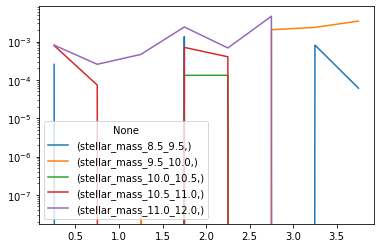

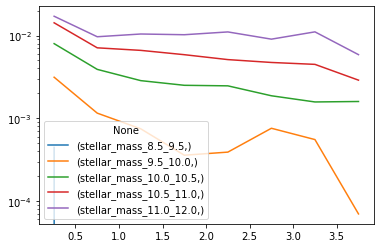

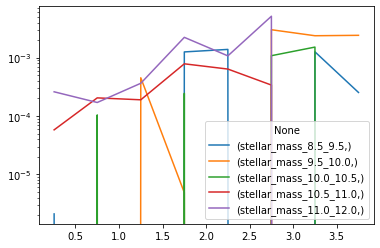

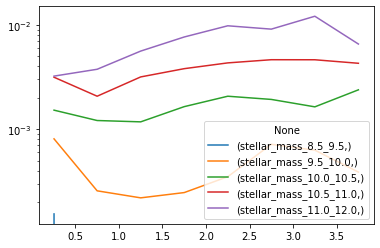

In [7]:
print(cosmos2020.results_dict.keys())
for iwv, ivals in cosmos2020.results_dict.items():
    #print(ivals['results_df'])
    flux_df = ivals['results_df']['flux_df']
    error_df = ivals['results_df']['error_df']
    
    for ipop in flux_df:
        #pdb.set_trace()
        ax = flux_df[ipop].plot();
        ax.set_yscale('log')


In [2]:
path_ini_file = os.path.join("examples","cosmos.ini")
cosmos = SimstackWrapper(path_ini_file, stack_automatically=True)
cosmos.parse_results()

Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of Layers Stacking Simultaneously = 9
Number of 

In [5]:
wavelengths = cosmos.results_dict.pop('wavelengths')
print(wavelengths)

KeyError: 'wavelengths'

In [8]:
cosmos.parameter_names

{'redshift': ['redshift_0.01_0.5',
  'redshift_0.5_1.0',
  'redshift_1.0_1.5',
  'redshift_1.5_2.0',
  'redshift_2.0_2.5',
  'redshift_2.5_3.0',
  'redshift_3.0_3.5',
  'redshift_3.5_4.0'],
 'stellar_mass': ['stellar_mass_8.5_9.5',
  'stellar_mass_9.5_10.0',
  'stellar_mass_10.0_11.0',
  'stellar_mass_11.0_12.0'],
 'pops': ['pops_0', 'pops_1']}

dict_keys(['spire_psw', 'spire_plw', 'scuba_850'])


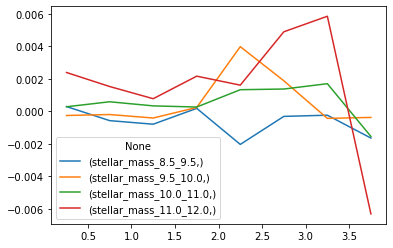

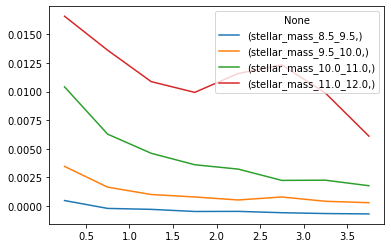

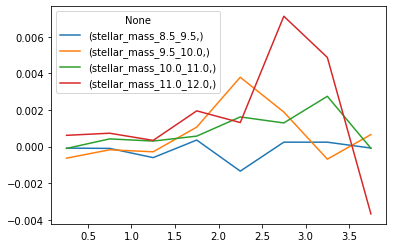

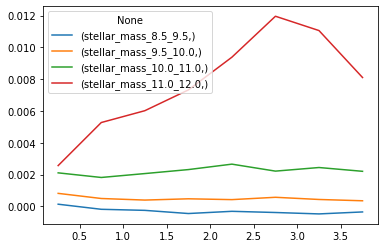

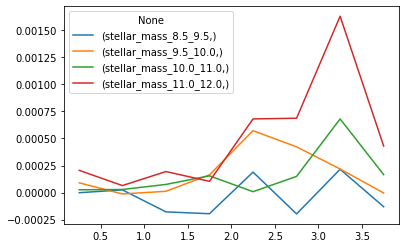

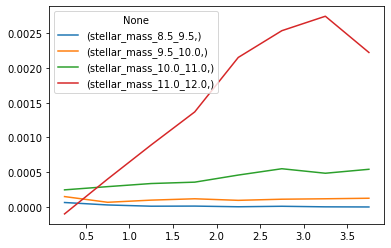

In [6]:
print(cosmos.results_dict.keys())
for iwv, ivals in cosmos.results_dict.items():
    #print(ivals['results_df'])
    flux_df = ivals['results_df']['flux_df']
    error_df = ivals['results_df']['error_df']
    
    for ipop in flux_df:
        #flux_df[ipop]['x']=x
        #pdb.set_trace()
        flux_df[ipop].plot();


dict_keys(['spire_plw', 'spire_psw', 'scuba_850'])


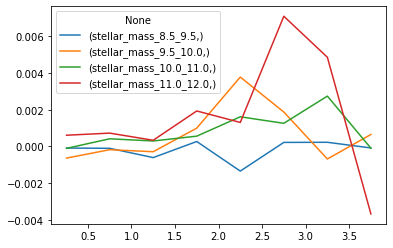

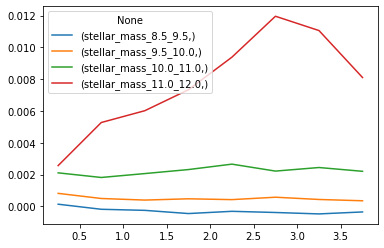

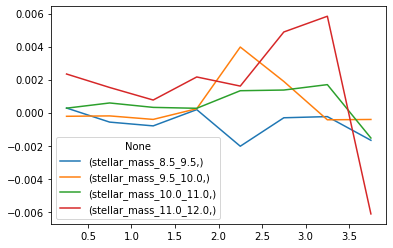

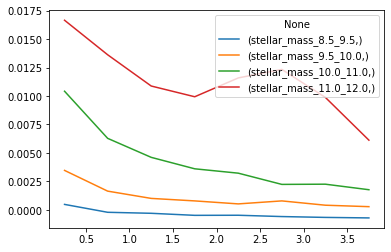

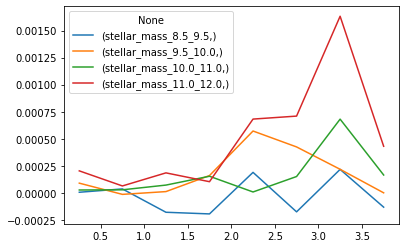

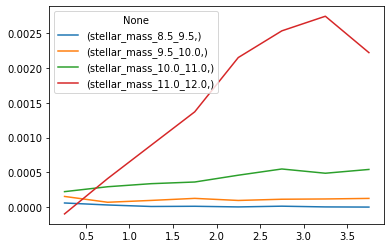

In [7]:
print(cosmos.results_dict.keys())
for iwv, ivals in cosmos.results_dict.items():
    #print(ivals['results_df'])
    flux_df = ivals['results_df']['flux_df']
    error_df = ivals['results_df']['error_df']
    
    for ipop in flux_df:
        #flux_df[ipop]['x']=x
        #pdb.set_trace()
        flux_df[ipop].plot();


dict_keys(['spire_psw', 'spire_plw', 'scuba_850'])


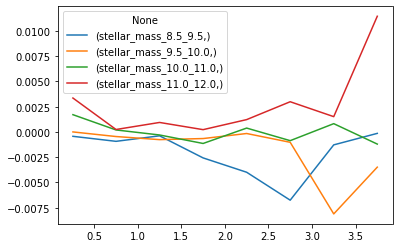

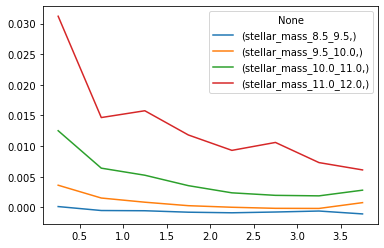

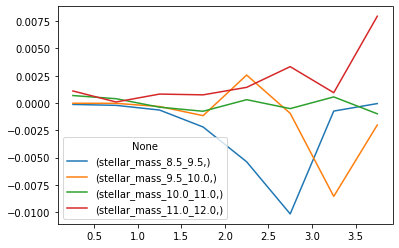

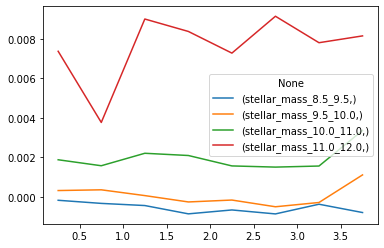

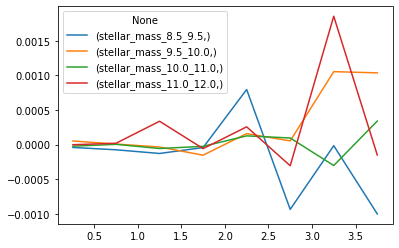

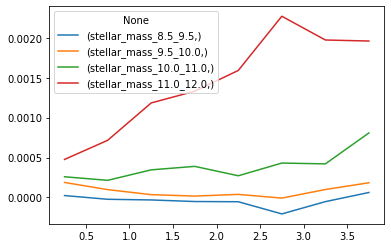

In [6]:
print(cosmos.results_dict.keys())
for iwv, ivals in cosmos.results_dict.items():
    #print(ivals['results_df'])
    flux_df = ivals['results_df']['flux_df']
    error_df = ivals['results_df']['error_df']
    
    for ipop in flux_df:
        #flux_df[ipop]['x']=x
        #pdb.set_trace()
        flux_df[ipop].plot();


In [8]:
path_ini_file = os.path.join("examples","hers_hetdex.ini")
hetdex = SimstackWrapper(path_ini_file, stack_automatically=True)
hetdex.parse_results()

Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3


In [17]:
hetdex.results_dict.keys()

dict_keys(['spire_plw', 'spire_psw', 'scuba_850', 'spire_pmw', 'wavelengths'])

dict_keys(['spire_plw', 'spire_psw', 'scuba_850', 'spire_pmw', 'wavelengths'])


AttributeError: 'dict' object has no attribute 'plot'

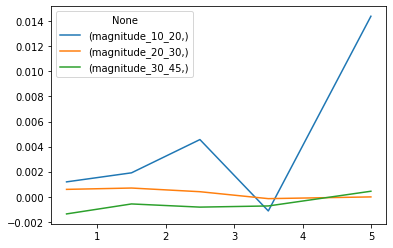

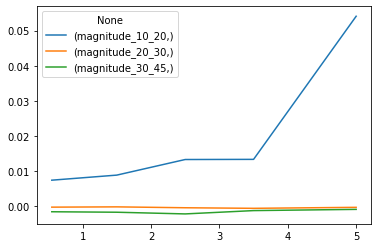

In [13]:
print(hetdex.results_dict.keys())
for iwv, ivals in hetdex.results_dict.items():
    flux_df = ivals['results_df']['flux_df']
    error_df = ivals['results_df']['error_df']

    flux_df.plot();


dict_keys(['spire_psw', 'spire_plw', 'scuba_850'])


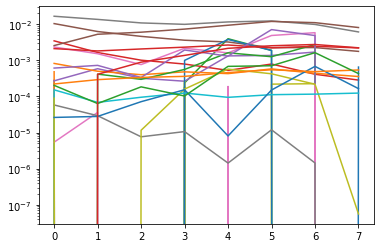

In [14]:
print(cosmos.results_dict.keys())
for iwv, ivals in cosmos.results_dict.items():
    for j, jmass in ivals['stellar_mass'].items():
        for k, kpop in jmass.items():
            #pdb.set_trace()
            plt.plot(kpop['flux_density'])
            plt.yscale('log')


In [15]:
cosmos.results_dict['spire_psw']['redshift']

{'redshift_0p01_0p5': {'pops_0': {'flux_density': array([ 0.00027969, -0.00022058,  0.00027103,  0.00233951]),
   'std_error': array([9.20997229e-05, 1.39088877e-04, 8.80827042e-05, 2.02126852e-04])},
  'pops_1': {'flux_density': array([0.00048328, 0.00346806, 0.01041947, 0.0166515 ]),
   'std_error': array([2.72424188e-05, 5.82037228e-05, 6.35095819e-05, 3.40486234e-04])}},
 'redshift_0p5_1p0': {'pops_0': {'flux_density': array([-0.00057219, -0.000197  ,  0.00058647,  0.00152383]),
   'std_error': array([7.15751931e-05, 8.77270969e-05, 3.98964658e-05, 8.88744198e-05])},
  'pops_1': {'flux_density': array([-0.00020972,  0.0016484 ,  0.00628239,  0.01362049]),
   'std_error': array([1.32024372e-05, 2.86077662e-05, 3.18576830e-05, 1.68439230e-04])}},
 'redshift_1p0_1p5': {'pops_0': {'flux_density': array([-0.00080112, -0.00040905,  0.0003191 ,  0.00076401]),
   'std_error': array([1.47585371e-04, 1.55463756e-04, 5.34109422e-05, 1.16400838e-04])},
  'pops_1': {'flux_density': array([-0.00

In [11]:
cosmos.results_dict['spire_psw']['stellar_mass']

{'stellar_mass_8.5_9.5': {'pops_0': {'flux_density': array([ 0.00027969, -0.00057219, -0.00080112,  0.0001837 , -0.00203279,
          -0.00030965, -0.0002392 , -0.00167424]),
   'std_error': array([9.20997229e-05, 7.15751931e-05, 1.47585371e-04, 2.70630922e-04,
          3.00402556e-04, 3.93159004e-04, 3.34616116e-04, 3.71230003e-04])},
  'pops_1': {'flux_density': array([ 0.00048328, -0.00020972, -0.00029798, -0.00047778, -0.0004695 ,
          -0.00058436, -0.00065873, -0.00070364]),
   'std_error': array([2.72424188e-05, 1.32024372e-05, 1.34300923e-05, 1.45621246e-05,
          1.73528385e-05, 2.06798824e-05, 2.66795522e-05, 3.50499938e-05])}},
 'stellar_mass_9.5_10.0': {'pops_0': {'flux_density': array([-0.00022058, -0.000197  , -0.00040905,  0.00023788,  0.00397269,
           0.0018893 , -0.00043309, -0.00041258]),
   'std_error': array([1.39088877e-04, 8.77270969e-05, 1.55463756e-04, 2.74916309e-04,
          3.99247096e-04, 5.48183666e-04, 5.50059363e-04, 5.79051874e-04])},
  

In [67]:
cosmos.config_dict['io']

{'output_folder': 'PICKLESPATH simstack stacked_flux_densities',
 'flux_densities_filename': 'simstack_flux_densities',
 'shortname': 'uVista__Laigle_v1.1__sf-qt__z_bins_in_slices_test'}

In [3]:
wavelengths = list(cosmos.results_dict.keys())
print(wavelengths)

['spire_plw', 'spire_psw', 'scuba_850']


spire_psw
spire_plw
spire_pmw
scuba_850
spire_plw


/var/folders/zh/17qnlt_94vg9lgd1dsnkzmf40000gn/T/ipykernel_22876/528850053.py:26: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  col.set_yscale('log')
/var/folders/zh/17qnlt_94vg9lgd1dsnkzmf40000gn/T/ipykernel_22876/528850053.py:26: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  col.set_yscale('log')
/var/folders/zh/17qnlt_94vg9lgd1dsnkzmf40000gn/T/ipykernel_22876/528850053.py:25: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  col.scatter(x, cosmos_results[:,j,k]*1e3, marker=marker[k])


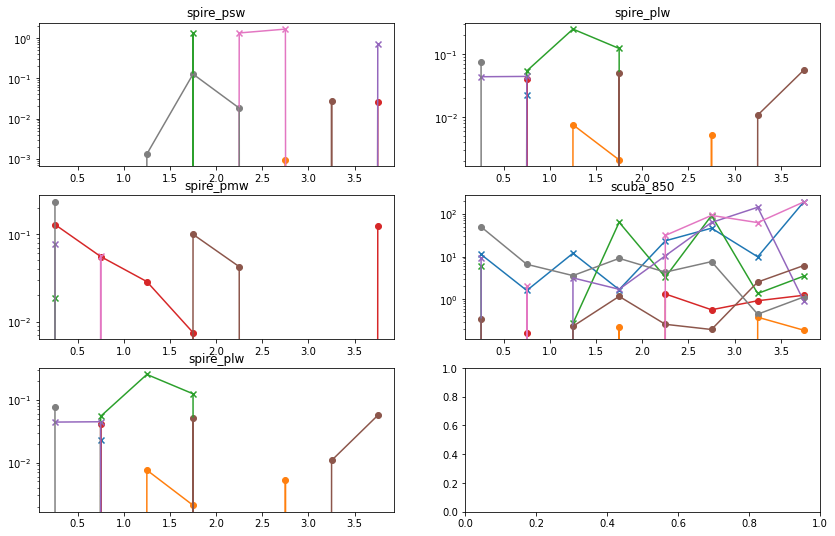

In [4]:
split_dict = json.loads(cosmos.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
wavelengths = list(cosmos.results_dict.keys())
if len(wavelengths) < 4:
    nrows = 1
    ncols = len(wavelengths)
else:
    nrows = 3
    ncols = 2
     
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=[14,9])
marker = ['x','o']
for iwv, row in enumerate(ax):
    for jwv, col in enumerate(row):
        kwv = ncols*jwv + iwv
        if kwv < len(wavelengths):
            wv = wavelengths[kwv]
            print(wv)
            cosmos_results = cosmos.results_dict[wv]['flux_density']
            nps = np.shape(cosmos_results)
            for j in range(nps[1]):
                for k in range(nps[2]):
                    col.plot(x, cosmos_results[:,j,k]*1e3)
                    col.scatter(x, cosmos_results[:,j,k]*1e3, marker=marker[k])
                    col.set_yscale('log')
            col.set_title(wv)

In [4]:
split_dict = json.loads(cosmos.config_dict['catalog']['classification'])
print(split_dict)

{'split_type': 'labels', 'redshift': {'id': 'PHOTOZ', 'bins': '[0.01, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]'}, 'stellar_mass': {'id': 'MASS_MED', 'bins': '[8.5, 9.5, 10.0, 11.0, 12.0]'}, 'pops': {'id': 'CLASS', 'bins': 2}}


In [32]:
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
print(len(x))
print(len(cosmos.results_dict[wv]['flux_density'][:,0,0]))

8
8


In [3]:
asize=np.shape(cosmos.results_dict[wv]['flux_density'])
marker = ['x','o']
#plt.subplots(1,3, figsize=(14,6))
for iwv, wv in enumerate(cosmos.results_dict):
    for imass in range(asize[1]):
        for ipop in range(asize[2]):
            plt.scatter(x, cosmos.results_dict['spire_psw']['flux_density'][:,imass,ipop], marker = marker[ipop])
            plt.yscale('log')

NameError: name 'wv' is not defined

In [51]:
x

array([0.255, 0.75 , 1.25 , 1.75 , 2.25 , 2.75 , 3.25 , 3.75 ])

TypeError: 'AxesSubplot' object is not iterable

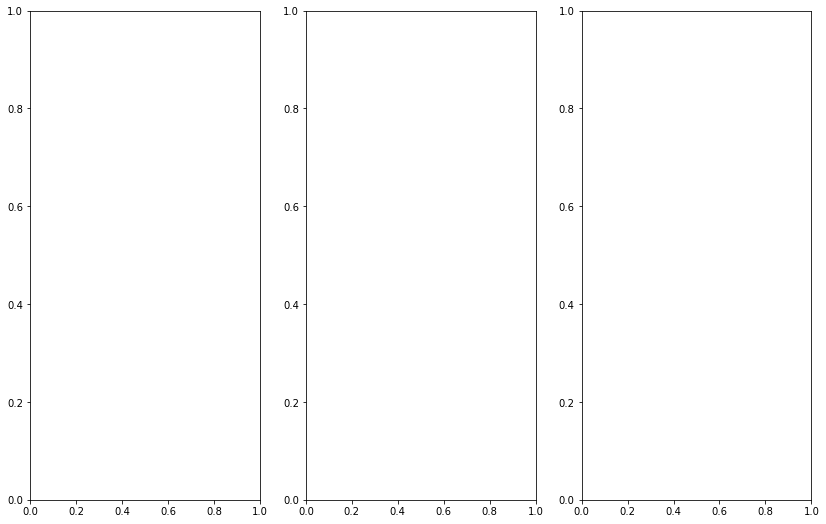

In [19]:
split_dict = json.loads(cosmos.config_dict['catalog']['classification'])

wavelengths = list(cosmos.results_dict.keys())
if len(wavelengths) < 4:
    nrows = 1
    ncols = len(wavelengths)
else:
    nrows = 3
    ncols = 2
     
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=[14,9])
marker = ['x','o']
for iwv, row in enumerate(ax):
    for jwv, col in enumerate(row):
        kwv = ncols*jwv + iwv
        if kwv < len(wavelengths):
            wv = wavelengths[kwv]
            print(wv)
            cosmos_results = cosmos.results_dict[wv]['flux_density']
            nps = np.shape(cosmos_results)
            for j in range(nps[1]):
                for k in range(nps[2]):
                    col.plot(x, cosmos_results[:,j,k]*1e3)
                    col.scatter(x, cosmos_results[:,j,k]*1e3, marker=marker[k])
                    col.set_yscale('log')
            col.set_title(wv)

spire_psw
spire_plw
spire_pmw
scuba_850
spire_plw


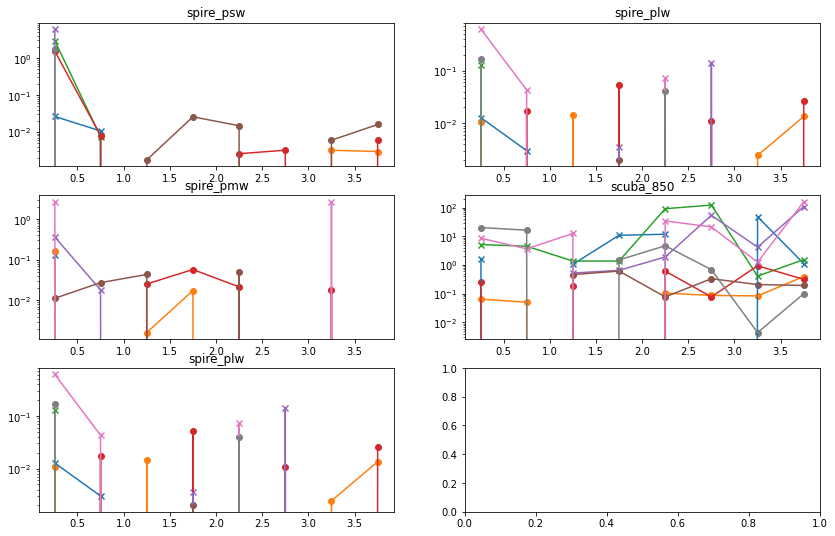

In [26]:
split_dict = json.loads(cosmos.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
wavelengths = list(cosmos.results_dict.keys())
if len(wavelengths) < 4:
    nrows = 1
    ncols = len(wavelengths)
else:
    nrows = 3
    ncols = 2
     
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=[14,9])
marker = ['x','o']
for iwv, row in enumerate(ax):
    for jwv, col in enumerate(row):
        kwv = ncols*jwv + iwv
        if kwv < len(wavelengths):
            wv = wavelengths[kwv]
            print(wv)
            cosmos_results = cosmos.results_dict[wv]['flux_density']
            nps = np.shape(cosmos_results)
            for j in range(nps[1]):
                for k in range(nps[2]):
                    col.plot(x, cosmos_results[:,j,k]*1e3)
                    col.scatter(x, cosmos_results[:,j,k]*1e3, marker=marker[k])
                    col.set_yscale('log')
            col.set_title(wv)

In [ ]:
hetdex.results_dict

{'spire_psw': {'flux_density': array([[ 0.00742964, -0.00024665, -0.00155378],
         [ 0.00886608, -0.00016534, -0.00168866],
         [ 0.01331358, -0.00041743, -0.00217376],
         [ 0.0133564 , -0.0005787 , -0.00122653],
         [ 0.05409268, -0.00029828, -0.000879  ]]),
  'std_error': array([[4.38808562e-04, 6.73230491e-05, 7.47129525e-04],
         [5.17188891e-04, 9.79089749e-05, 4.92194423e-04],
         [8.69068309e-04, 1.11879148e-04, 4.03804973e-04],
         [9.80658253e-04, 9.26924837e-05, 3.23432872e-04],
         [2.34562789e-03, 6.92939527e-05, 2.29092193e-04]])},
 'spire_plw': {'flux_density': array([[ 1.18312974e-03,  5.84848511e-04, -1.37496183e-03],
         [ 1.90525248e-03,  6.91210314e-04, -5.78740707e-04],
         [ 4.55838822e-03,  3.98529715e-04, -8.32008985e-04],
         [-1.13565067e-03, -1.54551615e-04, -7.38263506e-04],
         [ 1.44021839e-02, -1.66647065e-05,  4.35966573e-04]]),
  'std_error': array([[4.37937873e-04, 6.44318416e-05, 7.50484110e-

In [35]:
path_ini_file = os.path.join("examples","hers_hetdex.ini")
hetdex = SimstackWrapper(path_ini_file, stack_automatically=True)
hetdex.parse_results()

Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3
Number of Layers Stacking Simultaneously = 3


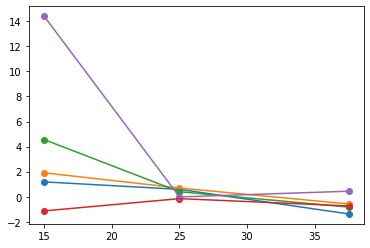

In [41]:
split_dict = json.loads(hetdex.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
mbins = np.array(json.loads(split_dict['magnitude']['bins']))
x = (mbins[:-1]+mbins[1:])/2
wv = 'spire_plw'
marker=['o','x']
mrange=0
for z, flux_group in enumerate(hetdex.results_dict[wv]['flux_density']):
    plt.plot(x[mrange:], flux_group[mrange:]*1e3)
    plt.scatter(x[mrange:], flux_group[mrange:]*1e3)
    #plt.yscale('log')
    #pdb.set_trace()

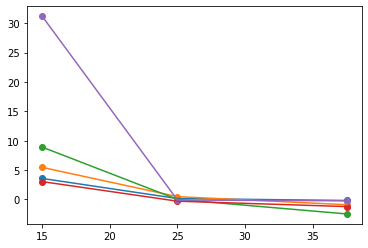

In [39]:
split_dict = json.loads(hetdex.config_dict['catalog']['classification'])
mbins = np.array(json.loads(split_dict['magnitude']['bins']))
x = (mbins[:-1]+mbins[1:])/2
wv = 'spire_pmw'
marker=['o','x']
mrange=0
for flux_group in hetdex.results_dict[wv]['flux_density']:
    plt.plot(x[mrange:], flux_group[mrange:]*1e3)
    plt.scatter(x[mrange:], flux_group[mrange:]*1e3)
    #plt.yscale('log')
    #pdb.set_trace()

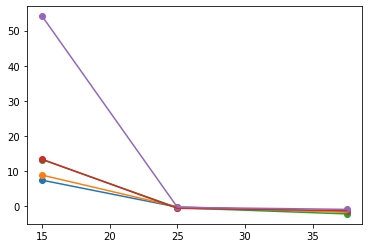

In [40]:
split_dict = json.loads(hetdex.config_dict['catalog']['classification'])
mbins = np.array(json.loads(split_dict['magnitude']['bins']))
x = (mbins[:-1]+mbins[1:])/2
wv = 'spire_psw'
marker=['o','x']
mrange=0
for flux_group in hetdex.results_dict[wv]['flux_density']:
    plt.plot(x[mrange:], flux_group[mrange:]*1e3)
    plt.scatter(x[mrange:], flux_group[mrange:]*1e3)
    #plt.yscale('log')
    #pdb.set_trace()

In [7]:
test_hetdex.maps_dict['spire_plw']['stacked_flux_densities'].keys()

dict_keys(['redshift_0p1_1', 'redshift_1_2', 'redshift_2_3', 'redshift_3_4', 'redshift_4_6'])

In [8]:
results = test_hetdex.results_dict['spire_plw']['flux_density']
nps = np.shape(results)
print(nps)

(5, 3)


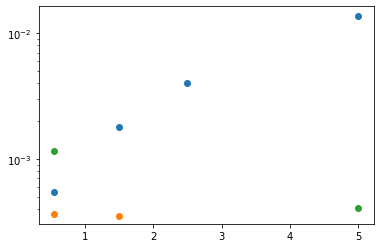

In [9]:
test_hetdex.parameter_names
split_dict = json.loads(test_hetdex.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
for i in range(nps[1]):
    plt.scatter(x, results[:,i])
    plt.yscale('log')

In [2]:
path_ini_file = os.path.join("examples","example.ini")
uvista = SimstackWrapper(path_ini_file, stack_automatically=True)
uvista.parse_results()

JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

In [ ]:
split_dict = json.loads(uvista.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
wavelengths = list(uvista.results_dict.keys())
print(wavelengths)
if len(wavelengths) < 4:
    nrows = 3
    ncols = len(wavelengths)
else:
    nrows = 3
    ncols = 2
     
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=[14,9])
marker = ['x','o']
for iwv, row in enumerate(ax):
    for jwv, col in enumerate(row):
        kwv = ncols*jwv + iwv
        if kwv < len(wavelengths):
            wv = wavelengths[kwv]
            print(wv)
            uvista_results = uvista.results_dict[wv]['flux_density']
            nps = np.shape(uvista_results)
            for j in range(nps[1]):
                for k in range(nps[2]):
                    col.plot(x, uvista_results[:,j,k]*1e3)
                    col.scatter(x, uvista_results[:,j,k]*1e3, marker=marker[k])
                    col.set_yscale('log')
            col.set_title(wv)

In [3]:
test_uvista.maps_dict['spire_plw']['stacked_flux_densities']

NameError: name 'test_uvista' is not defined

In [18]:
json.loads(json.loads(test_uvista.config_dict['catalog']['classification'])['redshift']['bins'])

[0.01, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

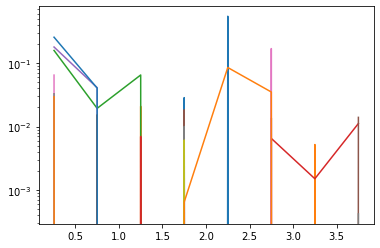

In [19]:
split_dict = json.loads(test_uvista.config_dict['catalog']['classification'])
zbins = np.array(json.loads(split_dict['redshift']['bins']))
x = np.array(zbins[:-1]+zbins[1:])*0.5
for i in range(nps[1]):
    for j in range(nps[2]):
        plt.plot(x, uvista_results[:,i,j]*1e3)
        plt.yscale ('log')

In [14]:
key = 'redshift_1p0_1p5'
test_uvista.maps_dict['spire_plw']['stacked_flux_densities'][key].params

Parameters([('redshift_1p0_1p5__stellar_mass_8p5_9p0__pops_0',
             <Parameter 'redshift_1p0_1p5__stellar_mass_8p5_9p0__pops_0', value=-0.0006722942659655533 +/- 2.89e-06, bounds=[-inf:inf]>),
            ('redshift_1p0_1p5__stellar_mass_8p5_9p0__pops_1',
             <Parameter 'redshift_1p0_1p5__stellar_mass_8p5_9p0__pops_1', value=2.089007102803389e-05 +/- 8.78e-08, bounds=[-inf:inf]>),
            ('redshift_1p0_1p5__stellar_mass_9p0_9p5__pops_0',
             <Parameter 'redshift_1p0_1p5__stellar_mass_9p0_9p5__pops_0', value=6.493400607380575e-05 +/- 9.7e-07, bounds=[-inf:inf]>),
            ('redshift_1p0_1p5__stellar_mass_9p0_9p5__pops_1',
             <Parameter 'redshift_1p0_1p5__stellar_mass_9p0_9p5__pops_1', value=6.99743001178106e-06 +/- 8.64e-08, bounds=[-inf:inf]>),
            ('redshift_1p0_1p5__stellar_mass_9p5_10p0__pops_0',
             <Parameter 'redshift_1p0_1p5__stellar_mass_9p5_10p0__pops_0', value=-3.9916101361618414e-05 +/- 7.09e-07, bounds=[-inf:inf]>),
            ('redshift_1p0_1p5__stellar_mass_9p5_10p0__pops_1',
             <Parameter 'redshift_1p0_1p5__stellar_mass_9p5_10p0__pops_1', value=-1.716404354639623e-05 +/- 1.05e-07, bounds=[-inf:inf]>),
            ('redshift_1p0_1p5__stellar_mass_10p0_10p5__pops_0',
             <Parameter 'redshift_1p0_1p5__stellar_mass_10p0_10p5__pops_0', value=-0.00013026065898781344 +/- 6.33e-07, bounds=[-inf:inf]>),
            ('redshift_1p0_1p5__stellar_mass_10p0_10p5__pops_1',
             <Parameter 'redshift_1p0_1p5__stellar_mass_10p0_10p5__pops_1', value=-7.906757377788623e-05 +/- 2.3e-07, bounds=[-inf:inf]>),
            ('redshift_1p0_1p5__stellar_mass_10p5_11p0__pops_0',
             <Parameter 'redshift_1p0_1p5__stellar_mass_10p5_11p0__pops_0', value=-8.695164903496451e-05 +/- 6.17e-07, bounds=[-inf:inf]>),
            ('redshift_1p0_1p5__stellar_mass_10p5_11p0__pops_1',
             <Parameter 'redshift_1p0_1p5__stellar_mass_10p5_11p0__pops_1', value=-0.00011707386685517143 +/- 3.44e-07, bounds=[-inf:inf]>),
            ('redshift_1p0_1p5__stellar_mass_11p0_12p0__pops_0',
             <Parameter 'redshift_1p0_1p5__stellar_mass_11p0_12p0__pops_0', value=-9.55974719068046e-06 +/- 5.22e-07, bounds=[-inf:inf]>),
            ('redshift_1p0_1p5__stellar_mass_11p0_12p0__pops_1',
             <Parameter 'redshift_1p0_1p5__stellar_mass_11p0_12p0__pops_1', value=-7.317520108954115e-05 +/- 9.06e-07, bounds=[-inf:inf]>)])

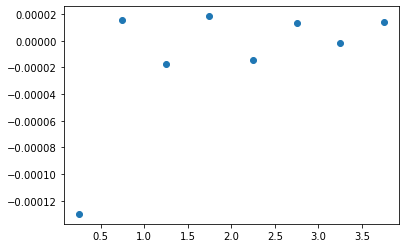

In [53]:
x

array([0.55, 1.5 , 2.5 , 3.5 , 4.5 , 5.5 ])

In [39]:
flux_density

[0.00036364386013441896,
 0.00041375502216667423,
 0.0002950844461433852,
 0.00018458649009391308,
 -8.367427002030895e-05,
 -0.0005145838158841628]

In [5]:
test_stack.split_table

ra       dec  redshift  stellar_mass
0      34.347645 -0.898693       2.0           0.0
1      34.356080 -0.903736       3.0           0.0
2      34.356940 -0.894889       5.0           0.0
3      34.348330 -0.921676       2.0           0.0
4      34.382614 -0.794835       1.0           0.0
...          ...       ...       ...           ...
50780  13.849249 -0.328271       1.0           0.0
50781  19.643736 -0.160820       2.0           0.0
50782  13.537420 -0.319323       0.0           0.0
50783  22.692255 -0.133485       0.0           0.0
50784  26.857704 -0.454477       1.0           0.0

[50785 rows x 4 columns]